# AUTOMATIC SNAG DISPOSITION USING MACHINE LEARNING ALGORITHMS

Problem Statement : 
To Design and Develop a Machine Learning Model using Machine Learning Algorithms like Multinomial Naive Bayes, Support Vector Machine, for the prediction of Snag Disposition based on SQMS (SNAG & QUERY MANAGEMENT SYSTEM) dataset. The live Snags taken for the validation of model.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn import model_selection,svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, precision_score, recall_score , confusion_matrix , classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV

In [2]:
df=pd.read_csv("e:\\snag.csv",encoding='ANSI')
pd.set_option('display.max_columns',None)
df.head()

,Unnamed: 0,SNAG_ID,ACNO,INSP_NAME,SHOP,INSP_STAGE,SNAG_DATE,SNAG_DESC,SNAG_STROKE,ENGR_FLAG,PART_NO,TASK_NO,SYSTEM,SUB_SYSTEM,PROJECT,CLOSE_DATE,DISPOSITION,Forward Date,Disp Date,DWG_NO
0,0,009/01009,-,100376 (A A KULKARNI),9,Before Anodising,2-Mar-13,(I) IN PARTS 11.0790.I.122.900;123.900;124.90...,Operators Fault,14043 (GAURAV KUMAR SINGH ),R0790.009.002,-,-,-,-,26-Jun-20,acceptable to design,4-Mar-13,12-Mar-13,NaN
1,1,009/01010,-,15530 (RAVINDRA DATTU PAWAR),9,Before Anodising,4-Mar-13,TOOL MARK NOTICED ON PART NO;11.2010.2.002.002...,Operators Fault,16030 (KESHAVE PRASAD DWIVEDI),R2010.009.002,-,-,-,-,15-Apr-13,suit the part 11.2010.2.002.002 with 11.2010....,5-Mar-13,25-Mar-13,11.2010.2.002.002
2,2,094/01002,SB-188,16528 (ADITYA SANJEEV JOGLEKAR),94,Installation,8-Mar-13,During leading edge assembly(11.2010.2.000.901...,Miscellaneous,13304 (ALOK KUMAR SINGH),-,SU30-94-466-3510401,-,-,SU30,-,it is allowed to file and merge the step.apply...,13-Mar-13,14-Mar-13,11.2010.2.000.901
3,3,094/01005,SB-187,16364 (SHANKAR BHAUSAHEB DHANAIT),94,Injig,9-Mar-13,52nd LH wing;DRG.11.2000.2.000.000 After insta...,Miscellaneous,15028 (RAKESH KUMAR),-,SU30-94-382-3420401,-,-,SU30,10-Jun-13,install shim between the flanges of wall-3 roo...,13-Mar-13,22-Mar-13,11.2000.2.000.000
4,4,009/01026,-,15530 (RAVINDRA DATTU PAWAR),9,Before Heat Treatment,12-Mar-13,As per main view of drg. gap noticed due to la...,Material fault,14044 (HEMANT N SAWANA ),E10.0200.0019.002,-,-,-,-,15-Apr-13,not acceptable to design,4-Apr-13,4-Apr-13,NaN


# Inspecting the DataFrame

In [3]:
df.shape

(10000, 20)

In [4]:
df.describe()

,Unnamed: 0
count,10000.00000
mean,4999.50000
std,2886.89568
min,0.00000
25%,2499.75000
50%,4999.50000
75%,7499.25000
max,9999.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    10000 non-null  int64 
 1   SNAG_ID       10000 non-null  object
 2   ACNO          9995 non-null   object
 3   INSP_NAME     10000 non-null  object
 4   SHOP          10000 non-null  object
 5   INSP_STAGE    10000 non-null  object
 6   SNAG_DATE     10000 non-null  object
 7   SNAG_DESC     10000 non-null  object
 8   SNAG_STROKE   10000 non-null  object
 9   ENGR_FLAG     10000 non-null  object
 10  PART_NO       10000 non-null  object
 11  TASK_NO       9995 non-null   object
 12  SYSTEM        9995 non-null   object
 13  SUB_SYSTEM    9995 non-null   object
 14  PROJECT       8549 non-null   object
 15  CLOSE_DATE    10000 non-null  object
 16  DISPOSITION   9999 non-null   object
 17  Forward Date  10000 non-null  object
 18  Disp Date     10000 non-null  object
 19  DWG_N

In [6]:
df.isnull().sum()

Unnamed: 0         0
SNAG_ID            0
ACNO               5
INSP_NAME          0
SHOP               0
INSP_STAGE         0
SNAG_DATE          0
SNAG_DESC          0
SNAG_STROKE        0
ENGR_FLAG          0
PART_NO            0
TASK_NO            5
SYSTEM             5
SUB_SYSTEM         5
PROJECT         1451
CLOSE_DATE         0
DISPOSITION        1
Forward Date       0
Disp Date          0
DWG_NO          6800
dtype: int64

The Above Analysis Porovides the Idea about the missing values in the DataFrame

In [7]:
df.isnull()

,Unnamed: 0,SNAG_ID,ACNO,INSP_NAME,SHOP,INSP_STAGE,SNAG_DATE,SNAG_DESC,SNAG_STROKE,ENGR_FLAG,PART_NO,TASK_NO,SYSTEM,SUB_SYSTEM,PROJECT,CLOSE_DATE,DISPOSITION,Forward Date,Disp Date,DWG_NO
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# Analysing the Given Data

In [8]:
df_categorical=df.select_dtypes(include=['object'])
print("This Shows the data which is not known or not given ")
df_categorical.apply(lambda x:x=='-',axis=0).sum()

This Shows the data which is not known or not given 


SNAG_ID            0
ACNO            3348
INSP_NAME         28
SHOP               0
INSP_STAGE       273
SNAG_DATE          0
SNAG_DESC          0
SNAG_STROKE       13
ENGR_FLAG        962
PART_NO         6886
TASK_NO         4494
SYSTEM          9632
SUB_SYSTEM      9635
PROJECT         1608
CLOSE_DATE      3447
DISPOSITION      112
Forward Date     997
Disp Date        123
DWG_NO             0
dtype: int64

Analysis of SNAG_STROKE observed 


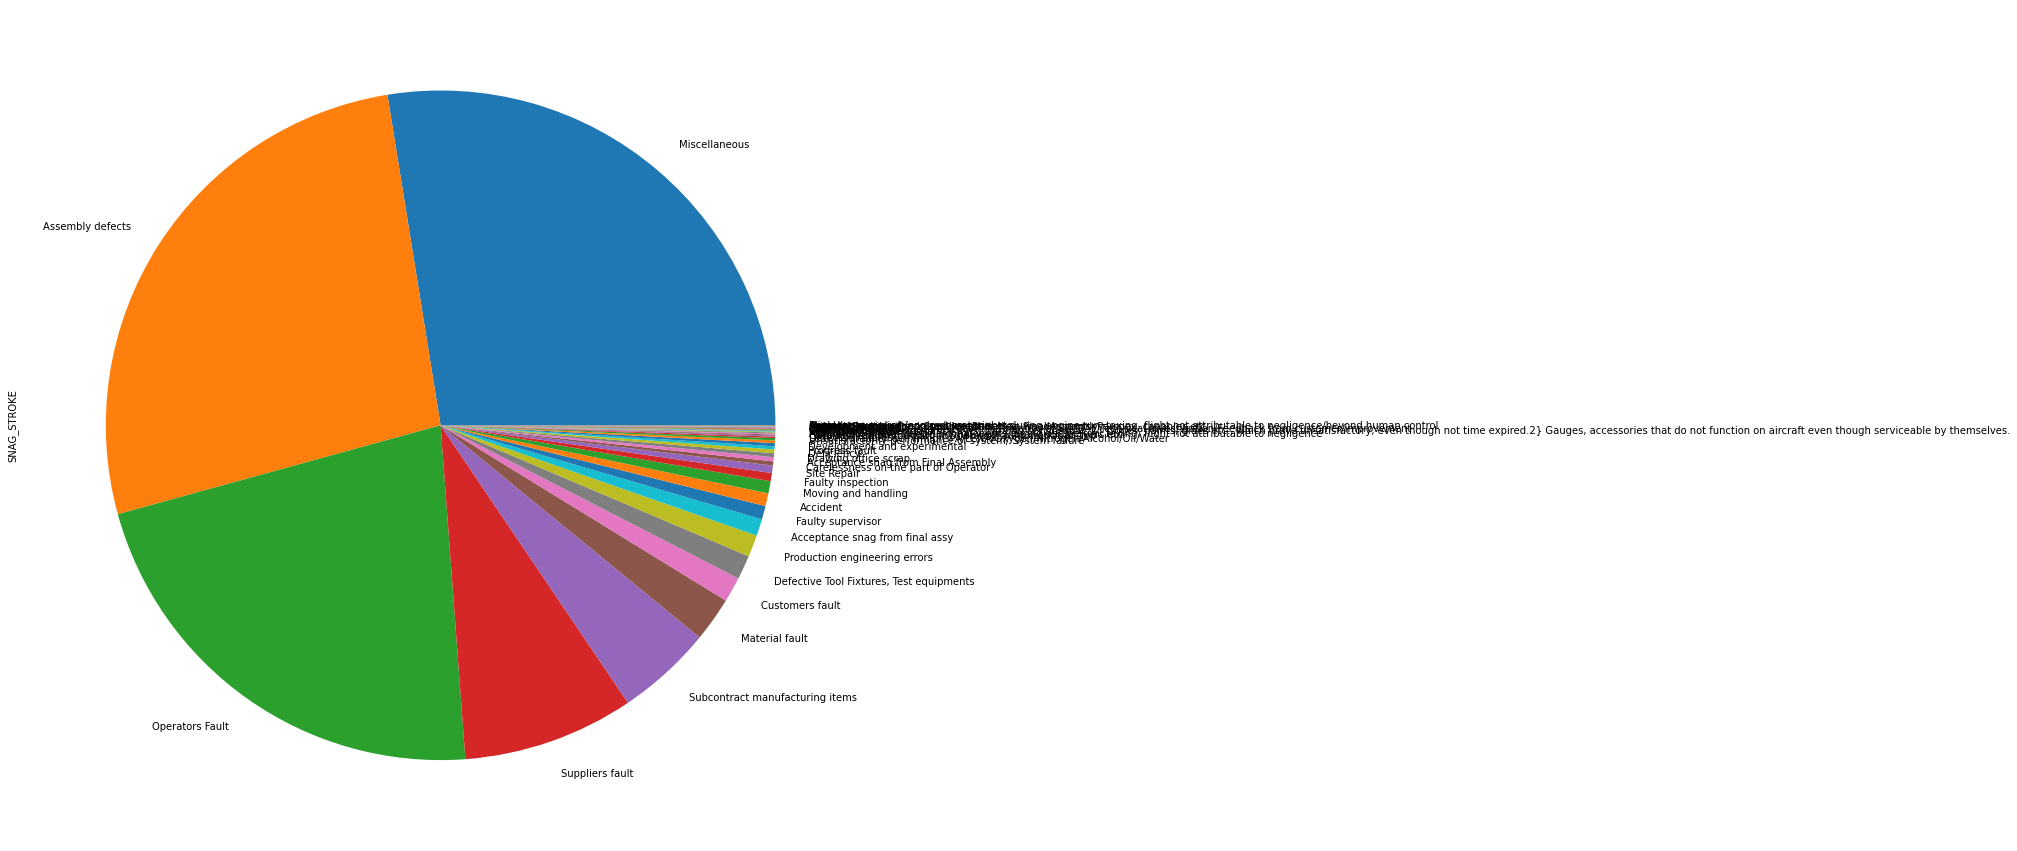

<Figure size 1440x1440 with 0 Axes>

In [11]:
df['SNAG_STROKE'].value_counts().plot.pie()
plt.figure(figsize=(20,20))
print("Analysis of SNAG_STROKE observed ")
plt.show()

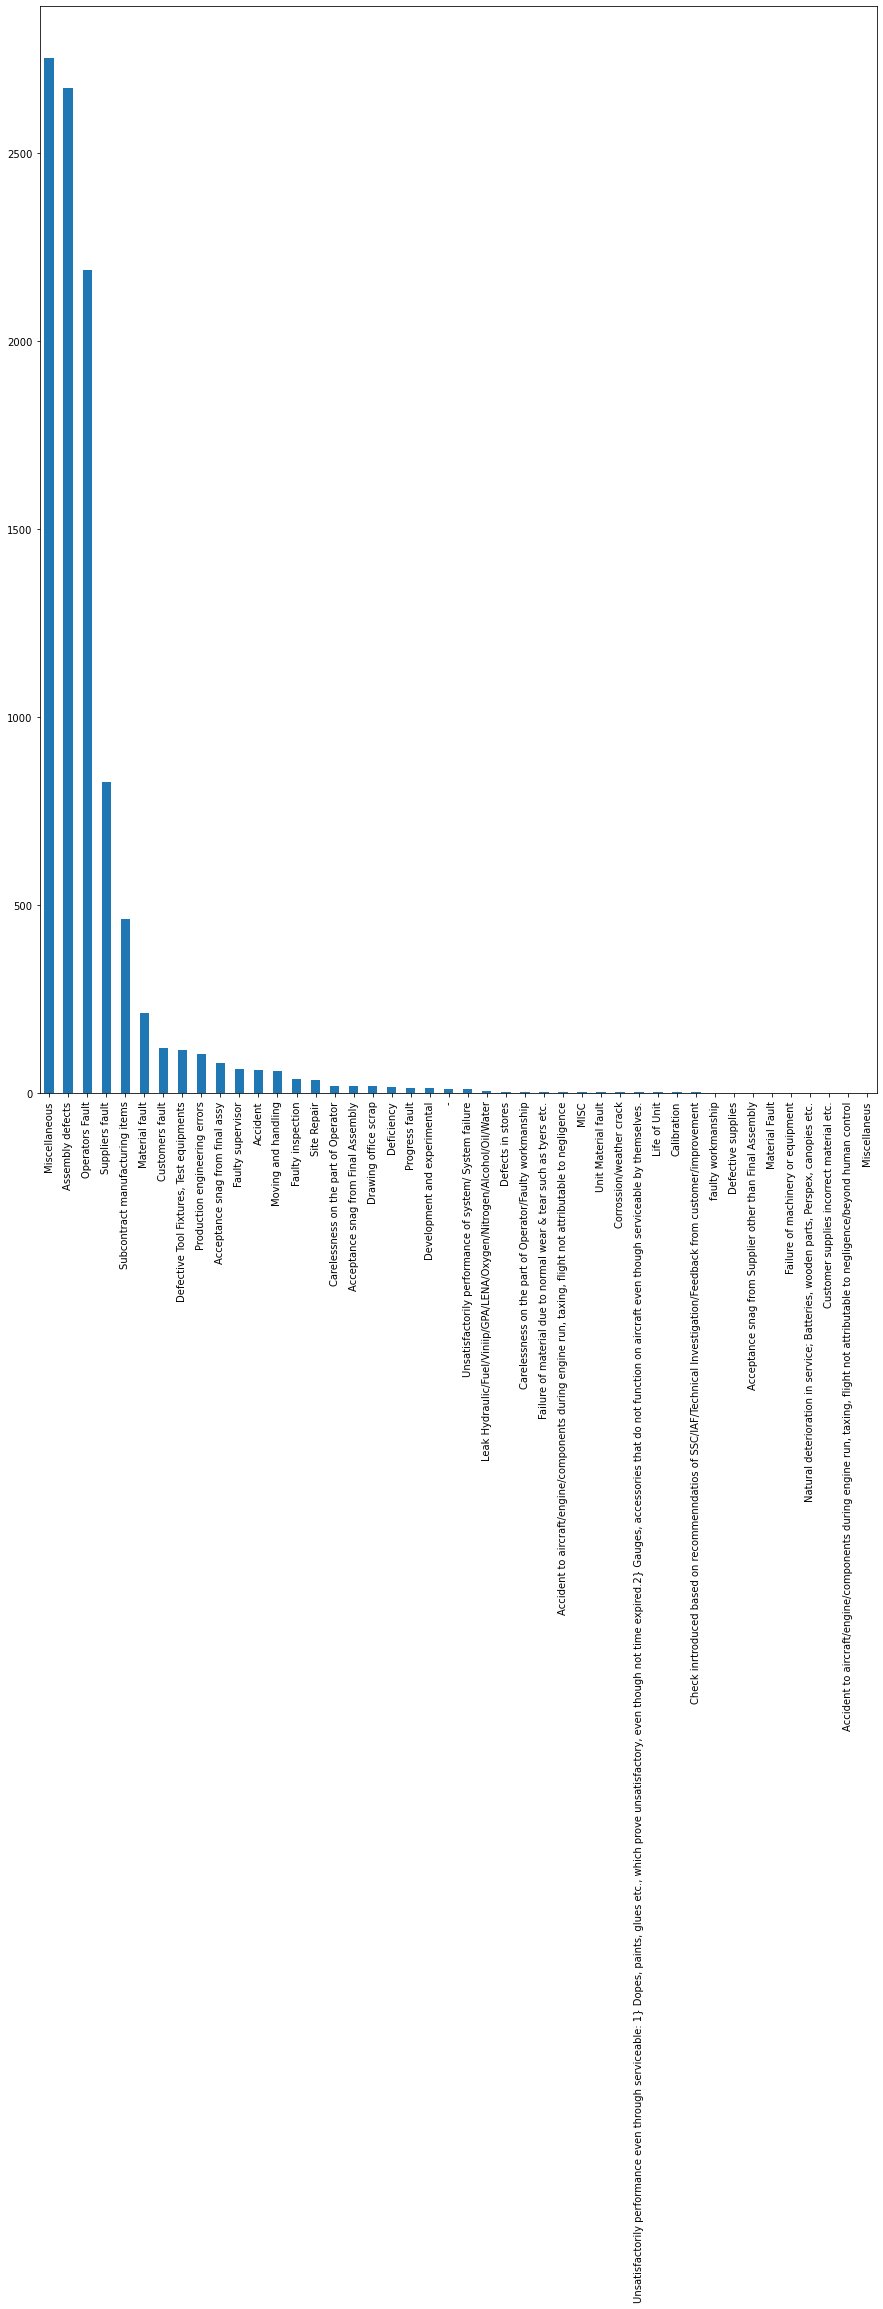

<Figure size 2160x1440 with 0 Axes>

In [12]:
df['SNAG_STROKE'].value_counts().plot.bar()
plt.figure(figsize=(30,20))
plt.show()

<AxesSubplot:ylabel='SHOP'>

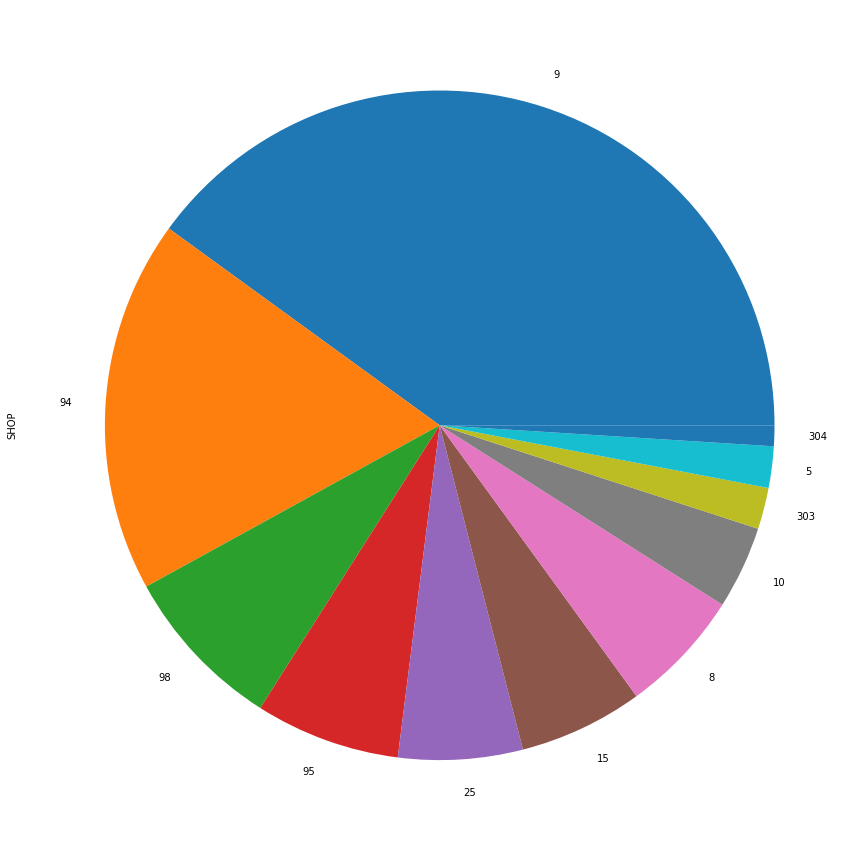

In [13]:
df['SHOP'].head(100).value_counts().plot.pie()


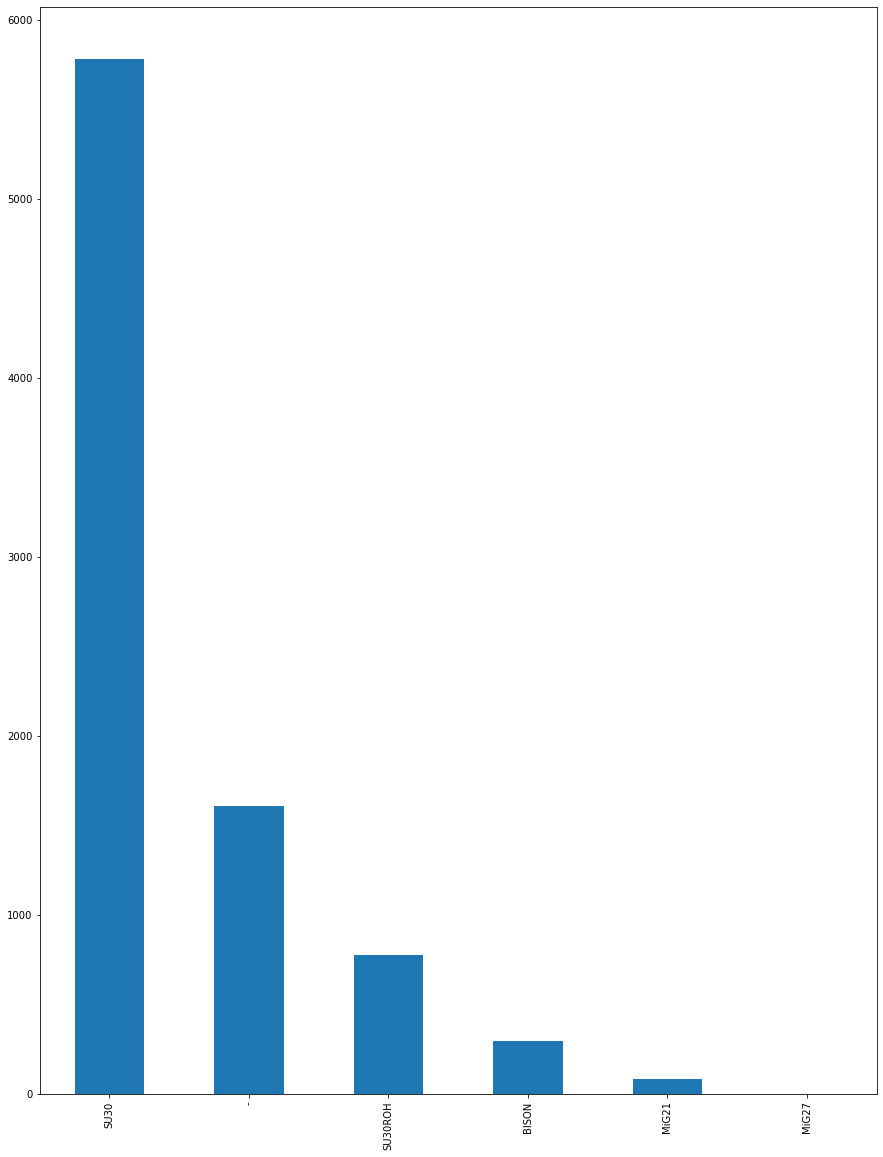

In [14]:
df['PROJECT'].value_counts().plot.bar()
plt.rcParams['figure.figsize']=(20,15)
plt.show()

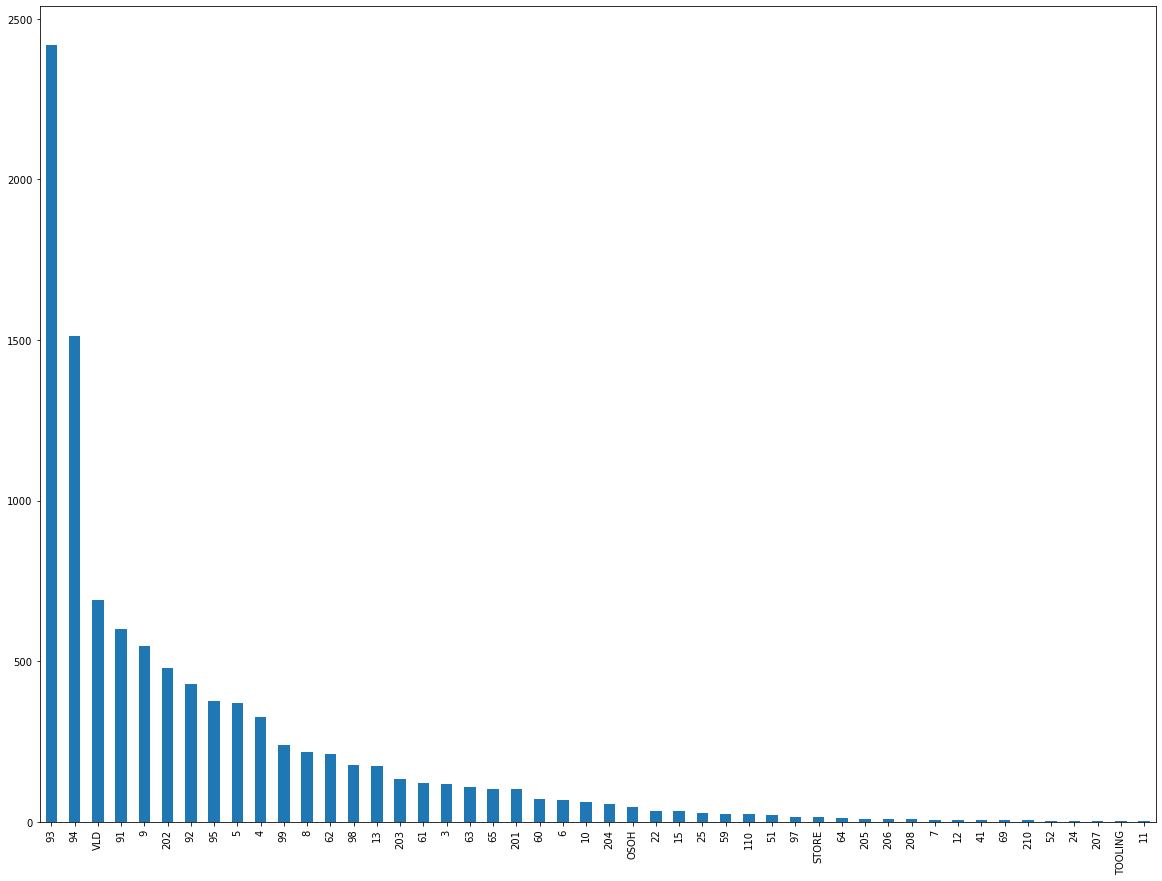

In [35]:
df['SHOP'].value_counts().plot.bar()
plt.rcParams['figure.figsize']=(20,15)
plt.show()

In [3]:
df['SHOP']=df['SHOP'].astype(str)
df['SHOP']=df['SHOP'].str.replace('VLD','301')
df['SHOP']=df['SHOP'].str.replace('OSOH','302')
df['SHOP']=df['SHOP'].str.replace('STORE','303')
df['SHOP']=df['SHOP'].str.replace('TOOLING','304')
df['SHOP']=df['SHOP'].astype(int)

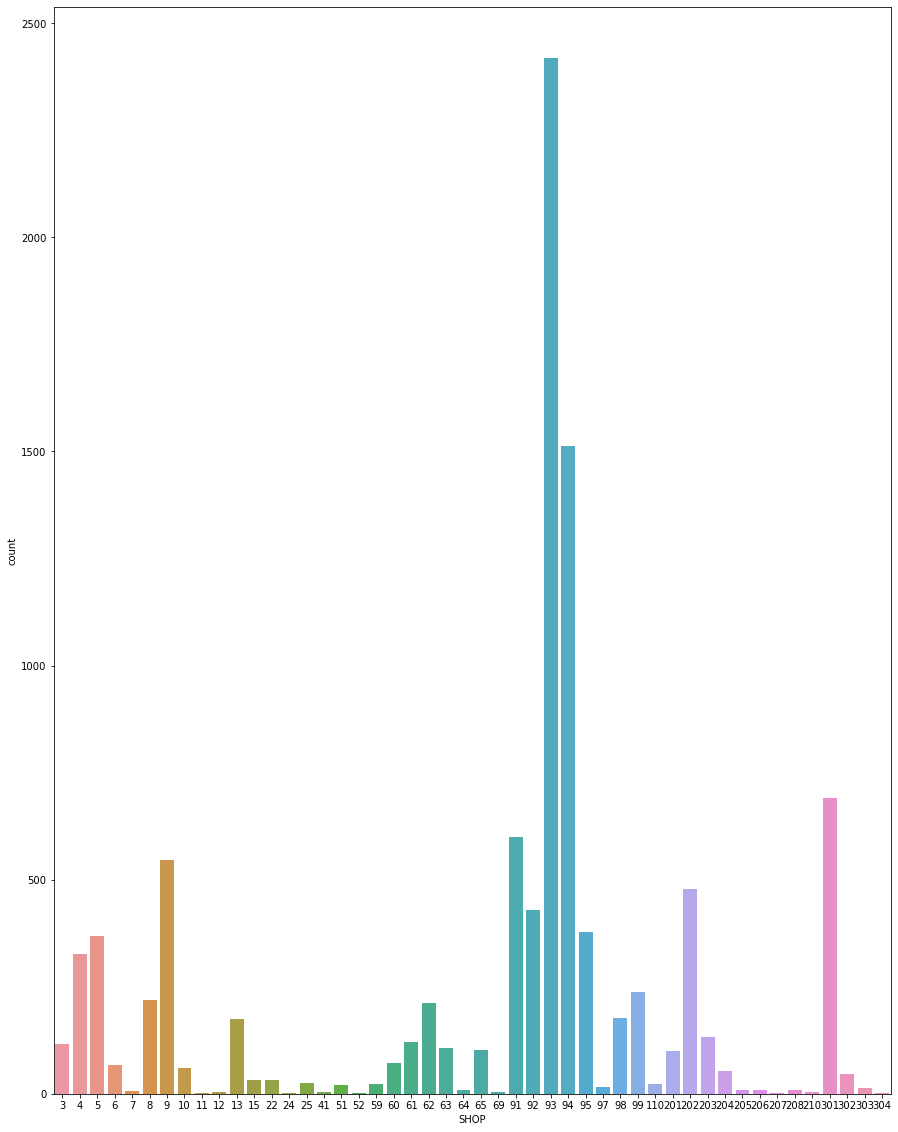

In [10]:
plt.rcParams['figure.figsize']=(15,20)
ax=sns.countplot(x=df['SHOP'])

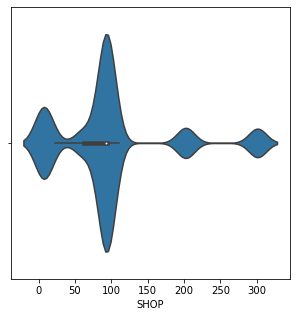

In [63]:
ax=sns.violinplot(x=df['SHOP'])
plt.rcParams['figure.figsize']=(5,5)

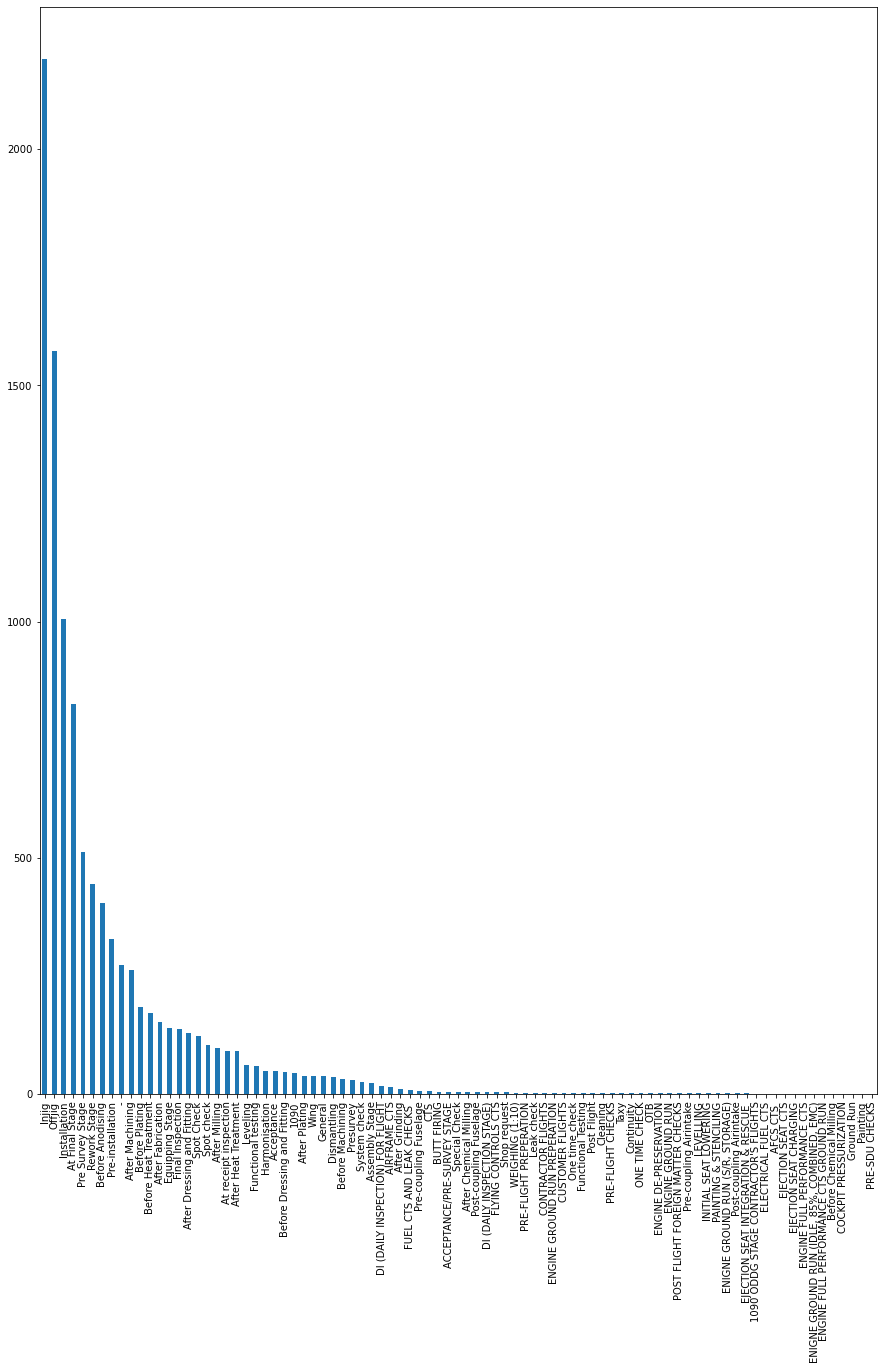

In [39]:
df['INSP_STAGE'].value_counts().plot.bar()
plt.rcParams['figure.figsize']=(20,15)
plt.show()

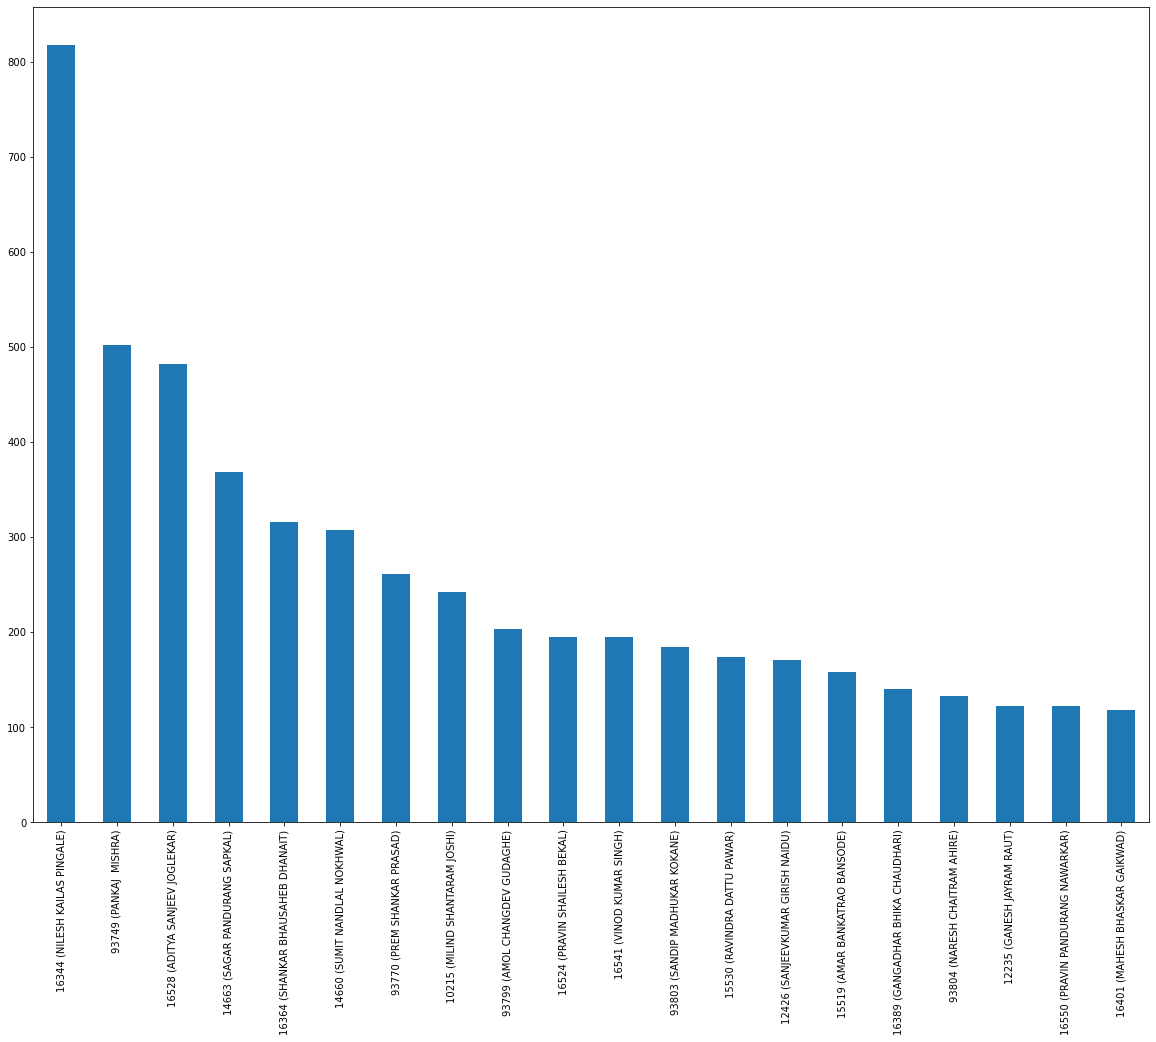

In [40]:
df['INSP_NAME'].value_counts()[0:20].plot.bar()
plt.rcParams['figure.figsize']=(30,20)
plt.show()

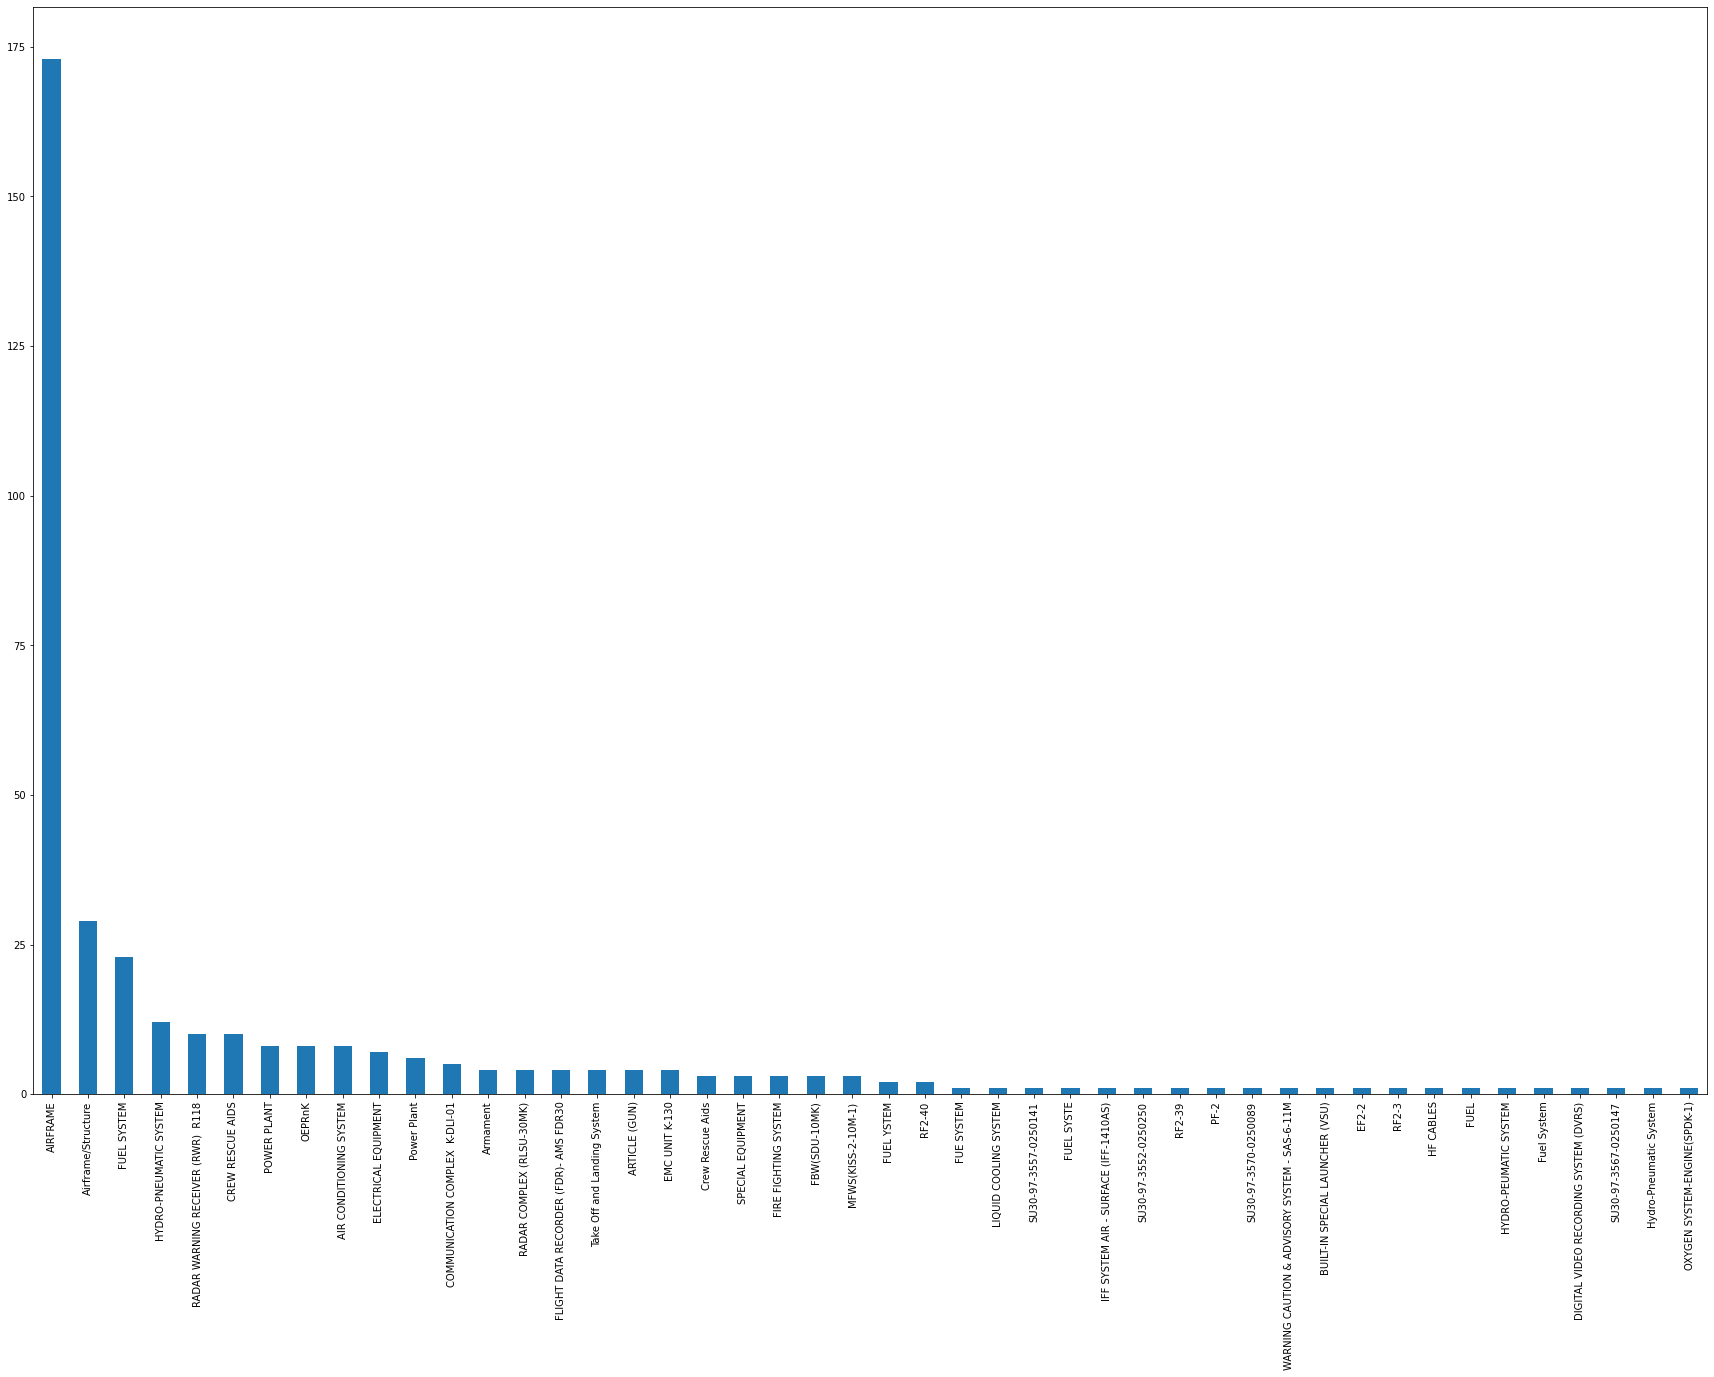

In [41]:
df['SYSTEM'].value_counts()[1:].plot.bar()
plt.rcParams['figure.figsize']=(30,20)
plt.show()

In [42]:
df['SYSTEM'].value_counts()

-                                                9632
AIRFRAME                                          173
Airframe/Structure                                 29
FUEL SYSTEM                                        23
HYDRO-PNEUMATIC SYSTEM                             12
RADAR WARNING RECEIVER (RWR)  R118                 10
CREW RESCUE AIDS                                   10
POWER PLANT                                         8
OEPRnK                                              8
AIR CONDITIONING SYSTEM                             8
ELECTRICAL EQUIPMENT                                7
Power Plant                                         6
COMMUNICATION COMPLEX  K-DLI-01                     5
Armament                                            4
RADAR COMPLEX (RLSU-30MK)                           4
FLIGHT DATA RECORDER (FDR)- AMS FDR30               4
Take Off and Landing System                         4
ARTICLE (GUN)                                       4
EMC UNIT K-130              

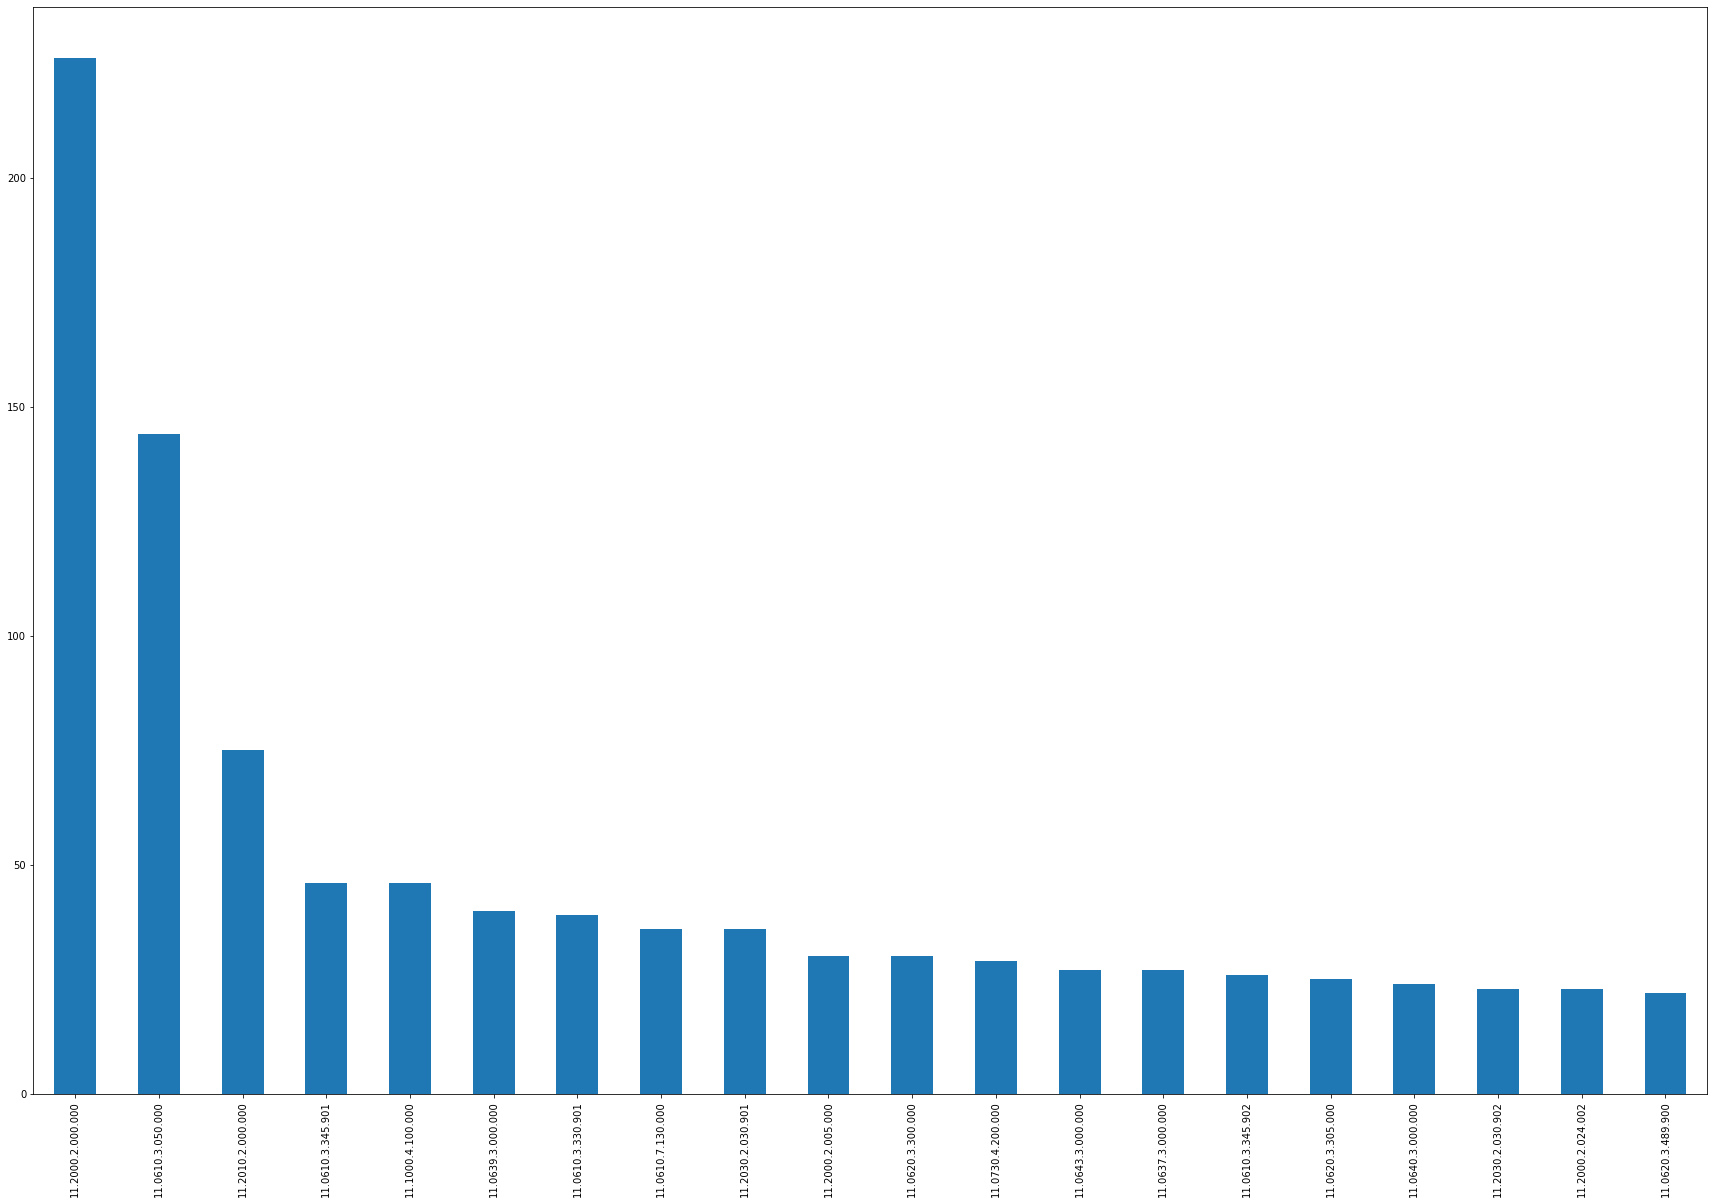

In [43]:
df['DWG_NO'].value_counts()[0:20].plot.bar()
plt.rcParams['figure.figsize']=(30,20)
plt.show()

# Data Preparation 

In [44]:
df['DWG_NO'].value_counts()

11.2000.2.000.000    226
11.0610.3.050.000    144
11.2010.2.000.000     75
11.0610.3.345.901     46
11.1000.4.100.000     46
                    ... 
11.0740.4.105.000      1
11.1005.7.004.900      1
11.0205.1.805.041      1
11.6130.0.200.000      1
11.0446.3.050.000      1
Name: DWG_NO, Length: 964, dtype: int64

In [45]:
df['DISPOSITION'].value_counts()

acceptable to design                                                                                                                                                                                                                                 1282
not acceptable to design                                                                                                                                                                                                                              179
-                                                                                                                                                                                                                                                     112
refer the attachment.                                                                                                                                                                                                                                  42


In [4]:
df['DISPOSITION']=df['DISPOSITION'].str.lower()

In [5]:

df['DISPOSITION']=df['DISPOSITION'].str.replace('refer the attachment.','refer the attachment')
df['DISPOSITION']=df['DISPOSITION'].str.replace('please refer the attachment','refer the attachment')
df['DISPOSITION']=df['DISPOSITION'].str.replace('refered not acceptable to design.','not acceptable to design')
df['DISPOSITION']=df['DISPOSITION'].str.replace('rework carried out by shop is acceptable to design.','acceptable to design')

In [48]:
df['DISPOSITION'].value_counts()/len(df.index)*100

acceptable to design                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      12.82
not acceptable to design                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [49]:
df['SNAG_STROKE'].value_counts()/len(df.index)*100

Miscellaneous                                                                                                                                                                                                                                   27.54
Assembly defects                                                                                                                                                                                                                                26.74
Operators Fault                                                                                                                                                                                                                                 21.90
Suppliers fault                                                                                                                                                                                                                                  8.27
Subcontract manu

In [6]:
def log(string):
    display(Markdown("> <span style='color:orange'>"+string+"</span>"))

In [7]:
df['SNAG_STROKE']=df['SNAG_STROKE'].str.replace('Miscellaneus', 'Miscelleneous')
df['SNAG_STROKE']=df['SNAG_STROKE'].str.replace('Material fault', 'Material Fault')

In [8]:
df['Status']=df['Unnamed: 0']
df.head(50)

,Unnamed: 0,SNAG_ID,ACNO,INSP_NAME,SHOP,INSP_STAGE,SNAG_DATE,SNAG_DESC,SNAG_STROKE,ENGR_FLAG,PART_NO,TASK_NO,SYSTEM,SUB_SYSTEM,PROJECT,CLOSE_DATE,DISPOSITION,Forward Date,Disp Date,DWG_NO,Status
0,0,009/01009,-,100376 (A A KULKARNI),9,Before Anodising,2-Mar-13,(I) IN PARTS 11.0790.I.122.900;123.900;124.90...,Operators Fault,14043 (GAURAV KUMAR SINGH ),R0790.009.002,-,-,-,-,26-Jun-20,acceptable to design,4-Mar-13,12-Mar-13,NaN,0
1,1,009/01010,-,15530 (RAVINDRA DATTU PAWAR),9,Before Anodising,4-Mar-13,TOOL MARK NOTICED ON PART NO;11.2010.2.002.002...,Operators Fault,16030 (KESHAVE PRASAD DWIVEDI),R2010.009.002,-,-,-,-,15-Apr-13,suit the part 11.2010.2.002.002 with 11.2010....,5-Mar-13,25-Mar-13,11.2010.2.002.002,1
2,2,094/01002,SB-188,16528 (ADITYA SANJEEV JOGLEKAR),94,Installation,8-Mar-13,During leading edge assembly(11.2010.2.000.901...,Miscellaneous,13304 (ALOK KUMAR SINGH),-,SU30-94-466-3510401,-,-,SU30,-,it is allowed to file and merge the step.apply...,13-Mar-13,14-Mar-13,11.2010.2.000.901,2
3,3,094/01005,SB-187,16364 (SHANKAR BHAUSAHEB DHANAIT),94,Injig,9-Mar-13,52nd LH wing;DRG.11.2000.2.000.000 After insta...,Miscellaneous,15028 (RAKESH KUMAR),-,SU30-94-382-3420401,-,-,SU30,10-Jun-13,install shim between the flanges of wall-3 roo...,13-Mar-13,22-Mar-13,11.2000.2.000.000,3
4,4,009/01026,-,15530 (RAVINDRA DATTU PAWAR),9,Before Heat Treatment,12-Mar-13,As per main view of drg. gap noticed due to la...,Material Fault,14044 (HEMANT N SAWANA ),E10.0200.0019.002,-,-,-,-,15-Apr-13,not acceptable to design,4-Apr-13,4-Apr-13,NaN,4
5,5,094/01012,-,16364 (SHANKAR BHAUSAHEB DHANAIT),94,Injig,12-Mar-13,52nd RH wing Drg.11.2000.2.000.000 After insta...,Miscellaneous,13312 (VISHAL YASHWANT DONGARE),-,SU30-94-381-3320401,-,-,SU30,10-Jun-13,it is allowed to install taper shim with seali...,13-Mar-13,22-Mar-13,11.2000.2.000.000,5
6,6,098/01006,SB-178,16084 (BIJAY KUMAR),98,Installation,14-Mar-13,Dent/Tool mark observed in PVD pipe line 11.77...,Operators Fault,14380 (SUMIT DIXIT ),-,SU30-98-IN-1816-2504011,FLIGHT DATA RECORDER (FDR)- AMS FDR30,Avionics bay connector & status display,SU30,30-Jan-17,replace the affected pipe line 11.7750.i.930.9...,15-Mar-13,15-Mar-13,NaN,6
7,7,009/01031,-,15530 (RAVINDRA DATTU PAWAR),9,At Final Stage,15-Mar-13,As per technology length 1000+3.0mm tech. allo...,Operators Fault,14044 (HEMANT N SAWANA ),11.0610.3.160.018,-,-,-,-,29-May-13,snag is provisionally acceptable to pp; howeve...,-,16-Mar-13,NaN,7
8,8,STORE/01002,-,101257 (Mr. GANESH HIRAMAN JADHAV),303,At receipt inspection,19-Mar-13,Material cotton fabric 1200 mm from M/S Urja p...,Material Fault,103860 (Mr. BHAGIRATH LAL MEENA),8.44511E+11,-,-,-,-,-,-,-,-,NaN,8
9,9,094/01017,SB-189,16528 (ADITYA SANJEEV JOGLEKAR),94,Pre-installation,19-Mar-13,After preliminary installation of diaphragms(1...,Suppliers fault,13304 (ALOK KUMAR SINGH),-,SU30-94-425-3620401,-,-,SU30,-,it is allowed to file the diaphragms 11.2030.2...,19-Mar-13,20-Mar-13,11.2030.2.004.002,9


In [9]:
df=df.drop(columns=['Unnamed: 0'])

In [10]:
def snag_desc_to_no(df):
    for x in range(len(df)):
        z=str(df['DISPOSITION'][x])
        if 'not acceptable' in z:
            df['Status'][x]=1
        elif 'acceptable' in z:
            df['Status'][x]=0
        else :
            df['Status'][x]=2   

In [11]:
snag_desc_to_no(df)
df1=df

In [65]:
df.head(30)

,SNAG_ID,ACNO,INSP_NAME,SHOP,INSP_STAGE,SNAG_DATE,SNAG_DESC,SNAG_STROKE,ENGR_FLAG,PART_NO,TASK_NO,SYSTEM,SUB_SYSTEM,PROJECT,CLOSE_DATE,DISPOSITION,Forward Date,Disp Date,DWG_NO,Status
0,009/01009,-,100376 (A A KULKARNI),9,Before Anodising,2-Mar-13,(I) IN PARTS 11.0790.I.122.900;123.900;124.90...,Operators Fault,14043 (GAURAV KUMAR SINGH ),R0790.009.002,-,-,-,-,26-Jun-20,acceptable to design,4-Mar-13,12-Mar-13,NaN,0
1,009/01010,-,15530 (RAVINDRA DATTU PAWAR),9,Before Anodising,4-Mar-13,TOOL MARK NOTICED ON PART NO;11.2010.2.002.002...,Operators Fault,16030 (KESHAVE PRASAD DWIVEDI),R2010.009.002,-,-,-,-,15-Apr-13,suit the part 11.2010.2.002.002 with 11.2010....,5-Mar-13,25-Mar-13,11.2010.2.002.002,2
2,094/01002,SB-188,16528 (ADITYA SANJEEV JOGLEKAR),94,Installation,8-Mar-13,During leading edge assembly(11.2010.2.000.901...,Miscellaneous,13304 (ALOK KUMAR SINGH),-,SU30-94-466-3510401,-,-,SU30,-,it is allowed to file and merge the step.apply...,13-Mar-13,14-Mar-13,11.2010.2.000.901,2
3,094/01005,SB-187,16364 (SHANKAR BHAUSAHEB DHANAIT),94,Injig,9-Mar-13,52nd LH wing;DRG.11.2000.2.000.000 After insta...,Miscellaneous,15028 (RAKESH KUMAR),-,SU30-94-382-3420401,-,-,SU30,10-Jun-13,install shim between the flanges of wall-3 roo...,13-Mar-13,22-Mar-13,11.2000.2.000.000,2
4,009/01026,-,15530 (RAVINDRA DATTU PAWAR),9,Before Heat Treatment,12-Mar-13,As per main view of drg. gap noticed due to la...,Material Fault,14044 (HEMANT N SAWANA ),E10.0200.0019.002,-,-,-,-,15-Apr-13,not acceptable to design,4-Apr-13,4-Apr-13,NaN,1
5,094/01012,-,16364 (SHANKAR BHAUSAHEB DHANAIT),94,Injig,12-Mar-13,52nd RH wing Drg.11.2000.2.000.000 After insta...,Miscellaneous,13312 (VISHAL YASHWANT DONGARE),-,SU30-94-381-3320401,-,-,SU30,10-Jun-13,it is allowed to install taper shim with seali...,13-Mar-13,22-Mar-13,11.2000.2.000.000,2
6,098/01006,SB-178,16084 (BIJAY KUMAR),98,Installation,14-Mar-13,Dent/Tool mark observed in PVD pipe line 11.77...,Operators Fault,14380 (SUMIT DIXIT ),-,SU30-98-IN-1816-2504011,FLIGHT DATA RECORDER (FDR)- AMS FDR30,Avionics bay connector & status display,SU30,30-Jan-17,replace the affected pipe line 11.7750.i.930.9...,15-Mar-13,15-Mar-13,NaN,2
7,009/01031,-,15530 (RAVINDRA DATTU PAWAR),9,At Final Stage,15-Mar-13,As per technology length 1000+3.0mm tech. allo...,Operators Fault,14044 (HEMANT N SAWANA ),11.0610.3.160.018,-,-,-,-,29-May-13,snag is provisionally acceptable to pp; howeve...,-,16-Mar-13,NaN,0
8,STORE/01002,-,101257 (Mr. GANESH HIRAMAN JADHAV),303,At receipt inspection,19-Mar-13,Material cotton fabric 1200 mm from M/S Urja p...,Material Fault,103860 (Mr. BHAGIRATH LAL MEENA),8.44511E+11,-,-,-,-,-,-,-,-,NaN,2
9,094/01017,SB-189,16528 (ADITYA SANJEEV JOGLEKAR),94,Pre-installation,19-Mar-13,After preliminary installation of diaphragms(1...,Suppliers fault,13304 (ALOK KUMAR SINGH),-,SU30-94-425-3620401,-,-,SU30,-,it is allowed to file the diaphragms 11.2030.2...,19-Mar-13,20-Mar-13,11.2030.2.004.002,2


In [12]:
df1=df1.drop(columns=['Forward Date','Disp Date','CLOSE_DATE','SNAG_DATE'])

In [13]:
df1.columns

Index(['SNAG_ID', 'ACNO', 'INSP_NAME', 'SHOP', 'INSP_STAGE', 'SNAG_DESC',
       'SNAG_STROKE', 'ENGR_FLAG', 'PART_NO', 'TASK_NO', 'SYSTEM',
       'SUB_SYSTEM', 'PROJECT', 'DISPOSITION', 'DWG_NO', 'Status'],
      dtype='object')

In [14]:
df1=df1.drop(columns=['SNAG_ID', 'ACNO', 'INSP_NAME', 'SHOP', 'INSP_STAGE',
       'SNAG_STROKE', 'ENGR_FLAG', 'PART_NO', 'TASK_NO', 'SYSTEM',
       'SUB_SYSTEM', 'PROJECT',  'DWG_NO'])

In [14]:
df1.head(30)

,SNAG_DESC,DISPOSITION,Status
0,(I) IN PARTS 11.0790.I.122.900;123.900;124.90...,acceptable to design,0
1,TOOL MARK NOTICED ON PART NO;11.2010.2.002.002...,suit the part 11.2010.2.002.002 with 11.2010....,2
2,During leading edge assembly(11.2010.2.000.901...,it is allowed to file and merge the step.apply...,2
3,52nd LH wing;DRG.11.2000.2.000.000 After insta...,install shim between the flanges of wall-3 roo...,2
4,As per main view of drg. gap noticed due to la...,not acceptable to design,1
5,52nd RH wing Drg.11.2000.2.000.000 After insta...,it is allowed to install taper shim with seali...,2
6,Dent/Tool mark observed in PVD pipe line 11.77...,replace the affected pipe line 11.7750.i.930.9...,2
7,As per technology length 1000+3.0mm tech. allo...,snag is provisionally acceptable to pp; howeve...,0
8,Material cotton fabric 1200 mm from M/S Urja p...,-,2
9,After preliminary installation of diaphragms(1...,it is allowed to file the diaphragms 11.2030.2...,2


In [15]:
df1['SNAG_DESC']=df1['SNAG_DESC'].str.lower()

In [16]:
df1['SNAG_DESC']=df1['SNAG_DESC'].str.replace('ref','reference')


# Making Test and Train DataSets
# Test -Train - Split

In [62]:
#Splitiing the dataset into training and testing data sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df1['SNAG_DESC'],df1['Status'],test_size=0.15,random_state=0)

In [63]:
X_train

7800    drg.no. 11.7603.3.100.000 ; during installatio...
9453    three brackets of nose door attachment bracket...
9690    reference nose cone bracket 11.7121.i325.000;b...
6477    reference part no 11.3115.3.021.900 and 11.311...
4178     during matching of engine hatch cover l.h. si...
                              ...                        
9225    reference privious snag 202/01123 {reference v...
4859    during rework of rivets of stringer-13 ( e10.1...
3264    dwg no-11.0620.i.005.000\na gap of 2.5mm notic...
9845    during suiting of angle 11.9267.i.008.001 with...
2732    drg.no. e10.061.i200.000 \njig no. 318.10ki.44...
Name: SNAG_DESC, Length: 8500, dtype: object

In [64]:
y_train

7800    2
9453    2
9690    0
6477    2
4178    2
       ..
9225    0
4859    2
3264    2
9845    2
2732    0
Name: Status, Length: 8500, dtype: int64

In [65]:
X_test

9394    snag raised by mahesh lohar\nsb-036 lh wing de...
898     drawing no;- 11.2000.2.110.000   11.2000.2.000...
2398    depression of 3mm to 5 mm noticed between fram...
5906    1)flange heightvary both side from 12.5mm to 1...
2343    during suiting bracket(11.7724i.860.000) to th...
                              ...                        
7990    drawing no- e10.0650.i.105.000\nduring install...
5056    as per attached snag copy received from vendor...
3910    dwg no- 11.0620.i.005.000\nfive holes of dia. ...
1281                  dimension ã˜15 mm measures ã˜16 mm.
8022    control stick rh side deflection found 153mm a...
Name: SNAG_DESC, Length: 1500, dtype: object

In [66]:
y_test

9394    2
898     0
2398    2
5906    2
2343    0
       ..
7990    0
5056    0
3910    0
1281    0
8022    2
Name: Status, Length: 1500, dtype: int64

In [67]:

from sklearn.feature_extraction.text import CountVectorizer

vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,6), lowercase=True, stop_words='english')
X_train_transformed=vec.fit_transform(X_train)
X_test_transformed=vec.transform(X_test)

In [68]:
X_train_transformed


<8500x378758 sparse matrix of type '<class 'numpy.int64'>'
	with 725120 stored elements in Compressed Sparse Row format>

In [69]:
vec.vocabulary_

{'': 0,
 'drg': 110095,
 'installation': 179301,
 'bolt': 59179,
 'hole': 162686,
 'dia': 94299,
 '5mm': 23281,
 'open': 252077,
 'edge': 125103,
 'drg installation': 111423,
 'installation bolt': 179630,
 'bolt hole': 59874,
 'hole dia': 163381,
 'dia 5mm': 95935,
 '5mm open': 27619,
 'open edge': 252136,
 'drg installation bolt': 111481,
 'installation bolt hole': 179647,
 'bolt hole dia': 59875,
 'hole dia 5mm': 163808,
 'dia 5mm open': 96572,
 '5mm open edge': 27620,
 'drg installation bolt hole': 111482,
 'installation bolt hole dia': 179648,
 'bolt hole dia 5mm': 59882,
 'hole dia 5mm open': 163970,
 'dia 5mm open edge': 96573,
 'drg installation bolt hole dia': 111483,
 'installation bolt hole dia 5mm': 179649,
 'bolt hole dia 5mm open': 59893,
 'hole dia 5mm open edge': 163971,
 'drg installation bolt hole dia 5mm': 111484,
 'installation bolt hole dia 5mm open': 179651,
 'bolt hole dia 5mm open edge': 59894,
 'brackets': 63712,
 'nose': 235713,
 'door': 105242,
 'attachment': 

In [67]:
len(vec.vocabulary_)

395130

# MODEL PREPARATION

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import model_selection,svm
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics

mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)
y_pred_class=mnb.predict(X_test_transformed)

print( "Accuracy of the Test is:",metrics.accuracy_score(y_test,y_pred_class)*100,"%")

Accuracy of the Test is: 72.06666666666666 %


In [71]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, precision_score, recall_score
precision, recall, fscore, support = score(y_test, y_pred_class)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.74363328 0.375      0.70874862]
recall: [0.6656535  0.03896104 0.83660131]
fscore: [0.70248597 0.07058824 0.76738609]
support: [658  77 765]


In [72]:
print("The Training Accuracy of the Model is:" ,metrics.accuracy_score(y_train,mnb.predict(X_train_transformed))*100, "%")

The Training Accuracy of the Model is: 95.27058823529411 %


In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[438,   3, 217],
       [ 28,   3,  46],
       [123,   2, 640]], dtype=int64)

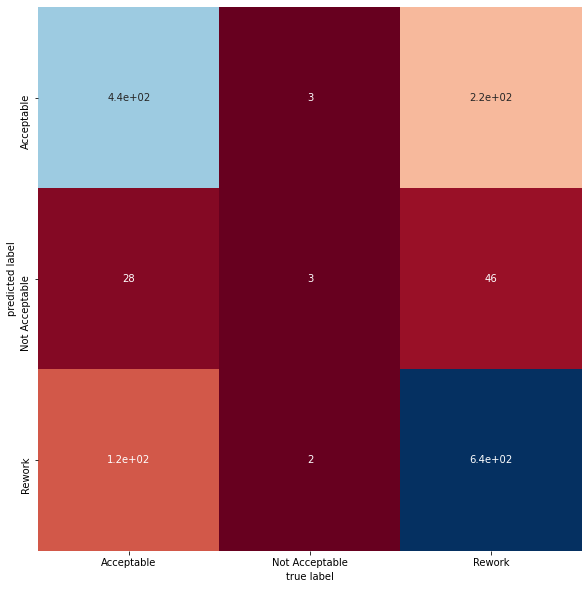

In [74]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))

cm = confusion_matrix(y_test, y_pred_class)
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Acceptable','Not Acceptable','Rework'], yticklabels=['Acceptable','Not Acceptable','Rework'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

## Using SVM 

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,5), lowercase=True, stop_words='english')
X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)

from sklearn.svm import SVC
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 72.2 %
SVM Training Accuracy Score : 99.01176470588236 %


In [32]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score, precision_score, recall_score
precision, recall, fscore, support = score(y_test, predictions_SVM)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.73387097 0.28571429 0.72769953]
recall: [0.69148936 0.1038961  0.81045752]
fscore: [0.71205008 0.15238095 0.7668522 ]
support: [658  77 765]


In [63]:
cm = confusion_matrix(y_test,predictions_SVM )
cm

array([[455,  13, 190],
       [ 27,   8,  42],
       [138,   7, 620]], dtype=int64)

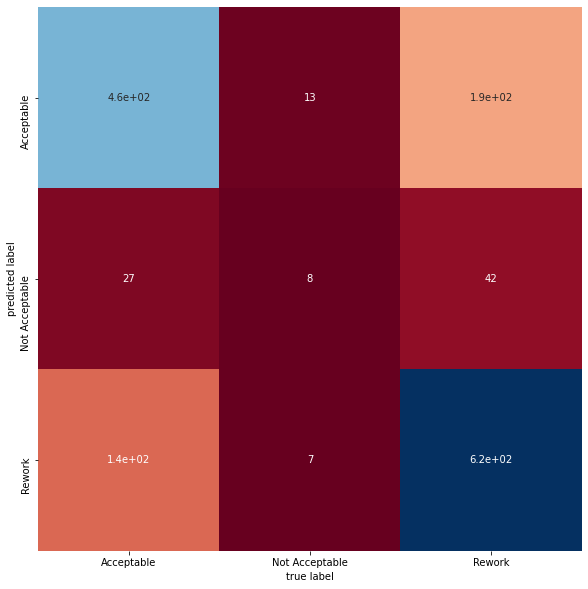

In [62]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))

cm = confusion_matrix(y_test,predictions_SVM )
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Acceptable','Not Acceptable','Rework'], yticklabels=['Acceptable','Not Acceptable','Rework'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


### The Model is good with accuracy greater than 70% but still can be enhanced using
#### (1) Dealing with class imbalance
#### (2) Hypertuning the parameters

In [17]:
def to_no(df):
    noc = 0
    acc = 0
    rew = 0
    for x in range(len(df)):
        z=int(df['Status'][x])
        if z == 1:
            noc+=1
        elif z == 0:
            acc+=1
        else:
            rew+=1
    return noc,acc,rew  

In [18]:
noc,acc,rew=to_no(df)
print("noc:",noc)
print("acc:",acc)
print("rew:",rew)

noc: 569
acc: 4206
rew: 5225


#### Upscaling the minority samples

In [19]:
df_majority=pd.DataFrame()
df_majority1=pd.DataFrame()
df_minority=pd.DataFrame()
df_minority_upsample=pd.DataFrame()
df_upsample=pd.DataFrame()

df_majority=df[(df['Status']==2)]
df_majority1=df[(df['Status']==0)]
df_minority=df[(df['Status']==1)]

for i in range(8):
    df_minority_upsample=pd.concat([df_minority,df_minority_upsample],ignore_index=True)
    
print(df_minority_upsample.shape)
df_minority_upsample.head()

(4552, 20)


,SNAG_ID,ACNO,INSP_NAME,SHOP,INSP_STAGE,SNAG_DATE,SNAG_DESC,SNAG_STROKE,ENGR_FLAG,PART_NO,TASK_NO,SYSTEM,SUB_SYSTEM,PROJECT,CLOSE_DATE,DISPOSITION,Forward Date,Disp Date,DWG_NO,Status
0,009/01026,-,15530 (RAVINDRA DATTU PAWAR),9,Before Heat Treatment,12-Mar-13,As per main view of drg. gap noticed due to la...,Material Fault,14044 (HEMANT N SAWANA ),E10.0200.0019.002,-,-,-,-,15-Apr-13,not acceptable to design,4-Apr-13,4-Apr-13,NaN,1
1,005/01002,-,13962 (SACHIN BHARGAVA),5,-,20-Mar-13,LEAK IS NOTICED THROUGH A CRACK ON THE CENTRAL...,Miscellaneous,10379 (CHANDRASHEKHAR SOMAJI HIREKAN),2.11.5305.8300.91,-,-,-,-,6-Apr-13,not acceptable to design,22-Mar-13,30-Mar-13,NaN,1
2,009/01040,-,100376 (A A KULKARNI),9,At Final Stage,21-Mar-13,AFTER ASSY OF PART 30.5200.8277 &8276 &OTHER P...,Operators Fault,14043 (GAURAV KUMAR SINGH ),R5200.009.001,-,-,-,-,26-Jun-20,play in the assembly is not acceptable to desi...,21-Mar-13,23-Mar-13,NaN,1
3,095/01005,SB-179,16541 (VINOD KUMAR SINGH),95,Offjig,1-Mar-13,During matching of hatch cover 11.0250.i.140.0...,Assembly defects,14035 (PAWAN KUMAR ),-,SU30-95-3447-4004015,-,-,SU30,30-Apr-13,not acceptable to design,1-Mar-13,15-Mar-13,NaN,1
4,009/01023,-,16401 (MAHESH BHASKAR GAIKWAD),9,After Machining,9-Mar-13,REF. SECTION V-V DIA. 4H7 MM HOLE NOGO PLAIN P...,Operators Fault,13392 (C V N V KIRAN KAMUJU),11.6500.3.110.001,-,-,-,-,13-Jun-13,snag is not acceptable as it is.\nenlarge the ...,9-Mar-13,11-Mar-13,NaN,1


In [20]:
df_majority=pd.concat([df_majority,df_majority1],ignore_index=True)
df_upsample=pd.concat([df_majority,df_minority_upsample],ignore_index=True)
df_upsample.shape

(13983, 20)

In [21]:
noc,acc,rew=to_no(df_upsample)
print("noc:",noc)
print("acc:",acc)
print("rew:",rew)

noc: 4552
acc: 4206
rew: 5225


In [22]:
X_train,X_test,y_train,y_test = train_test_split(df_upsample['SNAG_DESC'],df_upsample['Status'],test_size=0.15,random_state=0)
vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,6), lowercase=True, stop_words='english')
X_train_transformed=vec.fit_transform(X_train)
X_test_transformed=vec.transform(X_test)


In [23]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)
predictions=mnb.predict(X_test_transformed)

print( "MultinomialNB Test Accuracy is :",metrics.accuracy_score(y_test,predictions)*100,"%")
print("MultinomialNB Training Accuracy is:" ,metrics.accuracy_score(y_train,mnb.predict(X_train_transformed))*100, "%" , "\n")
precision, recall, fscore, support = score(y_test, predictions)
print(metrics.classification_report(y_test,predictions))

MultinomialNB Test Accuracy is : 78.31267874165873 %
MultinomialNB Training Accuracy is: 95.97812368531763 % 

              precision    recall  f1-score   support

           0       0.77      0.56      0.65       619
           1       0.80      1.00      0.89       717
           2       0.77      0.76      0.76       762

    accuracy                           0.78      2098
   macro avg       0.78      0.77      0.77      2098
weighted avg       0.78      0.78      0.77      2098



In [85]:
cm = confusion_matrix(y_test,predictions )
cm

array([[348,  98, 173],
       [  0, 717,   0],
       [103,  81, 578]], dtype=int64)

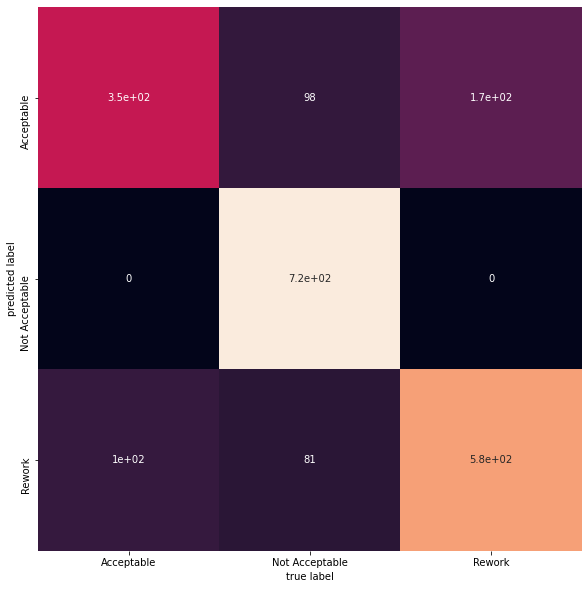

In [88]:
plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test,predictions )
sns.heatmap(cm, square=True, annot=True, cbar=False,xticklabels=['Acceptable','Not Acceptable','Rework'], yticklabels=['Acceptable','Not Acceptable','Rework'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [86]:

from sklearn import model_selection,svm
from sklearn.svm import SVC

SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=0.01)
SVM.fit(X_train_transformed, y_train)
predictions_SVM = SVM.predict(X_test_transformed)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%" )
print("SVM Training Accuracy Score :",accuracy_score(SVM.predict(X_train_transformed), y_train)*100,"%" , "\n")
precision, recall, fscore, support = score(y_test, predictions_SVM)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print(metrics.classification_report(y_test,predictions_SVM))

SVM Accuracy Score : 82.93612964728312 %
SVM Training Accuracy Score : 99.25115692048801 %
precision: [0.75181159 0.94591029 0.7715736 ]
recall: [0.67043619 1.         0.79790026]
fscore: [0.7087959  0.97220339 0.78451613]
support: [619 717 762]
              precision    recall  f1-score   support

           0       0.75      0.67      0.71       619
           1       0.95      1.00      0.97       717
           2       0.77      0.80      0.78       762

    accuracy                           0.83      2098
   macro avg       0.82      0.82      0.82      2098
weighted avg       0.83      0.83      0.83      2098



In [87]:
cm = confusion_matrix(y_test,predictions_SVM )
cm

array([[415,  24, 180],
       [  0, 717,   0],
       [137,  17, 608]], dtype=int64)

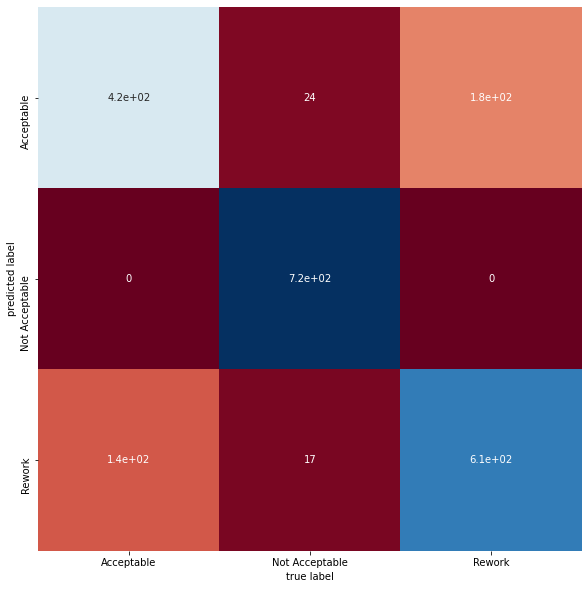

In [89]:
plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test,predictions_SVM )
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,xticklabels=['Acceptable','Not Acceptable','Rework'], yticklabels=['Acceptable','Not Acceptable','Rework'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


Hypertuning the parameters

In [23]:
X_train_cv = X_train_transformed
X_test_cv = X_test_transformed

In [24]:
from sklearn.svm import SVC
SVM_t1 = svm.SVC(C=10.0, kernel='linear', degree=3, gamma=0.01)
SVM_t1.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t1.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t1.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 82.65014299332698 %
SVM Training Accuracy Score : 99.25115692048801 %


In [25]:
from sklearn.svm import SVC
SVM_t2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=0.01)
SVM_t2.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t2.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t2.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 82.93612964728312 %
SVM Training Accuracy Score : 99.25115692048801 %


In [26]:
from sklearn.svm import SVC
SVM_t3 = svm.SVC(C=0.1, kernel='linear', degree=3, gamma=0.01)
SVM_t3.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t3.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t3.predict(X_train_cv), y_train)*100,"%")


SVM Accuracy Score : 83.46043851286939 %
SVM Training Accuracy Score : 98.90618426588136 %


In [27]:
from sklearn.svm import SVC
SVM_t4 = svm.SVC(C=0.1, kernel='rbf', degree=3, gamma=0.01)
SVM_t4.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t4.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t4.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 51.42993326978075 %
SVM Training Accuracy Score : 55.42280185107278 %


In [28]:
from sklearn.svm import SVC
SVM_t5 = svm.SVC(C=1, kernel='rbf', degree=3, gamma=0.01)
SVM_t5.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t5.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t5.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 81.41086749285034 %
SVM Training Accuracy Score : 95.10307109802272 %


In [29]:
from sklearn.svm import SVC
SVM_t6 = svm.SVC(C=10, kernel='rbf', degree=3, gamma=0.01)
SVM_t6.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t6.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t6.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 83.0791229742612 %
SVM Training Accuracy Score : 99.1586032814472 %


In [30]:
from sklearn.svm import SVC
SVM_t7 = svm.SVC(C=100, kernel='rbf', degree=3, gamma=0.01)
SVM_t7.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t7.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t7.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 82.84080076263108 %
SVM Training Accuracy Score : 99.25115692048801 %


## Upsampling again using randomClassifiers and Smote and proceding further

In [33]:
df2=pd.read_csv("e:\\snagsover1.csv",encoding='ANSI')
df2=df2.drop(columns=['Forward Date','Disp Date','CLOSE_DATE','SNAG_DATE'])
pd.set_option('display.max_columns',None)
df2.shape

(24562, 17)

In [34]:
df2['Status']=df2["target"]
df2.head()

,SNAG_ID,INSP_NAME,SHOP,INSP_STAGE,SNAG_DESC,SNAG_STROKE,ENGR_FLAG,PART_NO,TASK_NO,SYSTEM,SUB_SYSTEM,PROJECT,DISPOSITION,DWG_NO,target,ACNO,P,Status
0,009/01009,100376 (A A KULKARNI),9,Before Anodising,(1) IN partS 11.0790.I.122.900;123.900;124.90...,Operators Fault,14043 (GAURAV KUMAR SINGH ),R0790.009.002,-,NaN,-,-,acceptable to design,NaN,0,NaN,NaN,0
1,009/01010,15530 (RAVINDRA DATTU PAWAR),9,Before Anodising,TOOL MARK NOTICED ON part NO;11.2010.2.002.002...,Operators Fault,16030 (KESHAVE PRASAD DWIVEDI),R2010.009.002,-,NaN,-,-,suit the part 11.2010.2.002.002 with 11.2010....,11.2010.2.002.002,2,NaN,NaN,2
2,094/01002,16528 (ADITYA SANJEEV JOGLEKAR),94,Installation,During leading edge assembly(11.2010.2.000.901...,Miscellaneous,13304 (ALOK KUMAR SINGH),-,SU30-94-466-3510401,NaN,-,SU30,it is allowed to file and merge the step.apply...,11.2010.2.000.901,2,SBNA188,NaN,2
3,094/01005,16364 (SHANKAR BHAUSAHEB DHANAIT),94,Injig,52nd LH wing; drawing .11.2000.2.000.000 Aft...,Miscellaneous,15028 (RAKESH KUMAR),-,SU30-94-382-3420401,NaN,-,SU30,install shim between the flanges of wall-3 roo...,11.2000.2.000.000,2,SBNA187,NaN,2
4,009/01026,15530 (RAVINDRA DATTU PAWAR),9,Before Heat Treatment,As per main view of drawing . gap noticed ...,Material fault,14044 (HEMANT N SAWANA ),E10.0200.0019.002,-,NaN,-,-,not acceptable to design,NaN,1,NaN,NaN,1


In [35]:
def snag_desc_to_no(df):
    for x in range(len(df)):
        z=str(df['DISPOSITION'][x])
        if 'not acceptable' in z:
            df['Status'][x]=1
        elif 'acceptable' in z:
            df['Status'][x]=0
        else :
            df['Status'][x]=2  

In [36]:
noc,acc,rew=to_no(df2)
print("noc:",noc)
print("acc:",acc)
print("rew:",rew)

noc: 5692
acc: 8419
rew: 10451


In [37]:
df2=df2.drop(columns=['P','target'])
snag_desc_to_no(df2)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(df2['SNAG_DESC'],df2['Status'],test_size=0.15,random_state=0)
vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,6), lowercase=True, stop_words='english')
X_train_transformed=vec.fit_transform(X_train)
X_test_transformed=vec.transform(X_test)

mnb=MultinomialNB()
mnb.fit(X_train_transformed,y_train)
Predictions=mnb.predict(X_test_transformed)

print( "Accuracy of the Test is:",metrics.accuracy_score(y_test,Predictions)*100,"%")
print("The Training Accuracy of the Model is:" ,metrics.accuracy_score(y_train,mnb.predict(X_train_transformed))*100, "%" , "\n")
precision, recall, fscore, support = score(y_test,Predictions)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

Accuracy of the Test is: 91.2347354138399 %
The Training Accuracy of the Model is: 95.11424055180342 % 

precision: [0.8989575  0.87253886 0.94976239]
recall: [0.888977   0.98364486 0.89221939]
fscore: [0.89393939 0.92476661 0.92009207]
support: [1261  856 1568]


In [34]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,Predictions)
cm

array([[1121,   67,   73],
       [  13,  842,    1],
       [ 113,   56, 1399]], dtype=int64)

In [35]:
print(metrics.classification_report(y_test,Predictions))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1261
           1       0.87      0.98      0.92       856
           2       0.95      0.89      0.92      1568

    accuracy                           0.91      3685
   macro avg       0.91      0.92      0.91      3685
weighted avg       0.91      0.91      0.91      3685



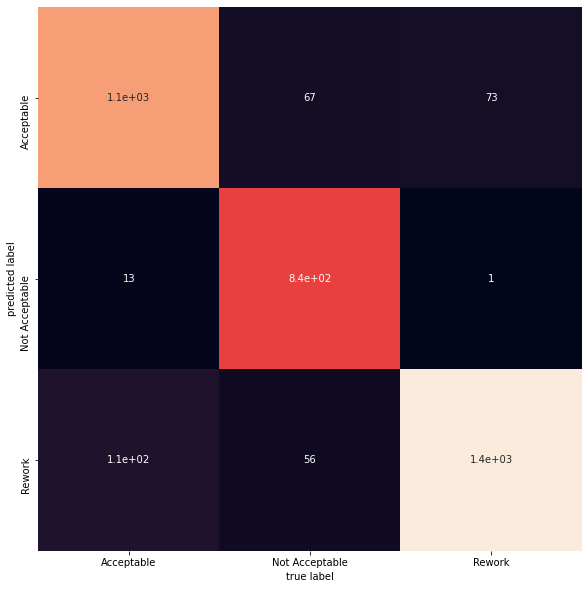

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test,Predictions )
sns.heatmap(cm, square=True, annot=True, cbar=False,
xticklabels=['Acceptable','Not Acceptable','Rework'], yticklabels=['Acceptable','Not Acceptable','Rework'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

In [39]:
from sklearn.svm import SVC
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=0.01)
SVM.fit(X_train_transformed, y_train)
predictions_SVM = SVM.predict(X_test_transformed)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM.predict(X_train_transformed), y_train)*100,"%" , "\n")
precision, recall, fscore, support = score(y_test, predictions_SVM)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

SVM Accuracy Score : 95.5495251017639 %
SVM Training Accuracy Score : 98.76419025722086 % 

precision: [0.9432     0.97139588 0.95643818]
recall: [0.93497224 0.99182243 0.95216837]
fscore: [0.9390681  0.98150289 0.9542985 ]
support: [1261  856 1568]


In [38]:
cm = confusion_matrix(y_test,predictions_SVM )
cm

array([[1179,   15,   67],
       [   6,  849,    1],
       [  65,   10, 1493]], dtype=int64)

In [39]:
print(metrics.classification_report(y_test,predictions_SVM))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1261
           1       0.97      0.99      0.98       856
           2       0.96      0.95      0.95      1568

    accuracy                           0.96      3685
   macro avg       0.96      0.96      0.96      3685
weighted avg       0.96      0.96      0.96      3685



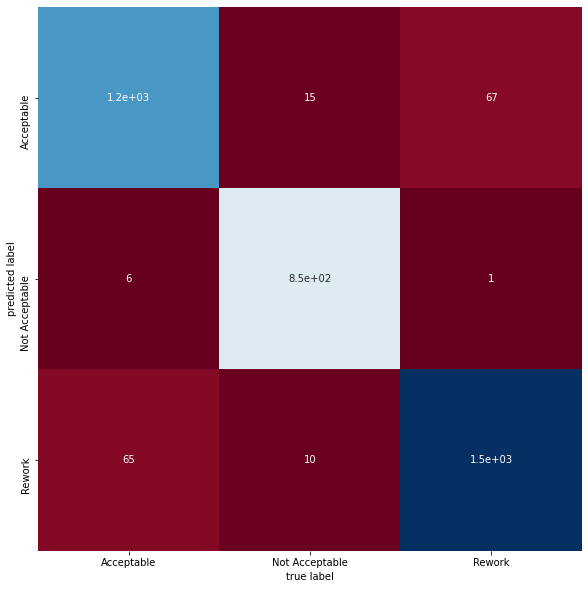

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,10))
cm = confusion_matrix(y_test,predictions_SVM )
sns.heatmap(cm, square=True, annot=True, cmap='RdBu', cbar=False,
xticklabels=['Acceptable','Not Acceptable','Rework'], yticklabels=['Acceptable','Not Acceptable','Rework'])
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

### Hyperparameter tuning

In [9]:
X_train,X_test,y_train,y_test = train_test_split(df2['SNAG_DESC'],df2['Status'],test_size=0.15,random_state=0)
vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',
                    ngram_range=(0,6), lowercase=True, stop_words='english')
X_train_transformed=vec.fit_transform(X_train)
X_test_transformed=vec.transform(X_test)

#Kfold cross-validation 

folds = KFold(n_splits = 5, shuffle = True, random_state = 101)
hyper_params = [{'gamma':[1e-1,1e-2,1e-3],'C':[1,10,100]}]
model = svm.SVC(kernel='rbf')
model_cv_svm = GridSearchCV(estimator=model,param_grid=hyper_params,scoring="accuracy",cv=folds,
                            n_jobs=-1,verbose=1,return_train_score=True)
model_cv_svm.fit(X_train_transformed,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [13]:
def display_stats(cv_results,param_value):
    gamma = cv_results[cv_results['param_gamma']==param_value]
    plt.plot(gamma['param_C'],gamma['mean_test_score'])
    plt.plot(gamma['param_C'],gamma['mean_train_score'])
    plt.xlabel('C')
    plt.ylabel('accuracy')
    plt.title("Gamma="+str(param_value))
    plt.ylim([0.6,1])
    plt.legend(['test accuracy','train accuracy'],loc='lower right')
    plt.xscale('log')

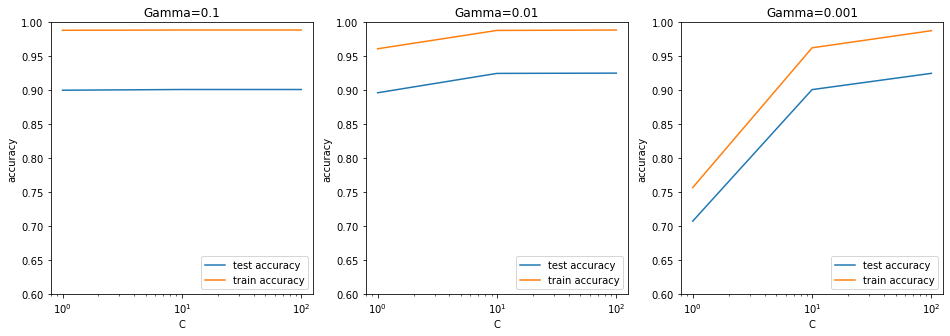

In [16]:
svm_cv_results = pd.DataFrame(model_cv_svm.cv_results_)
svm_cv_results['param_C'] = svm_cv_results['param_C'].astype('int')
gamma=[1e-1,1e-2,1e-3]
plt.figure(figsize=(16,5))
plt.subplot(131)
display_stats(svm_cv_results,gamma[0])
plt.subplot(132)
display_stats(svm_cv_results,gamma[1])
plt.subplot(133)
display_stats(svm_cv_results,gamma[2])
plt.show()

In [48]:
X_train,X_test,y_train,y_test = train_test_split(df2['SNAG_DESC'],df2['Status'],test_size=0.15,random_state=0)
vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,6), lowercase=True, stop_words='english')
X_train_transformed=vec.fit_transform(X_train)
X_test_transformed=vec.transform(X_test)
X_train_cv = X_train_transformed
X_test_cv = X_test_transformed

In [24]:
from sklearn.svm import SVC
SVM_t1 = svm.SVC(C=10.0, kernel='linear', degree=3, gamma=0.01)
SVM_t1.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t1.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t1.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 95.30529172320217 %
SVM Training Accuracy Score : 98.7689802174642 %


In [26]:
from sklearn.svm import SVC
SVM_t2 = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=0.01)
SVM_t2.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t2.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t2.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 95.5495251017639 %
SVM Training Accuracy Score : 98.76419025722086 %


In [49]:
from sklearn.svm import SVC
SVM_t3 = svm.SVC(C=0.1, kernel='linear', degree=3, gamma=0.01)
SVM_t3.fit(X_train_cv, y_train)
# predict the labels on validation dataset
predictions_SVM = SVM_t3.predict(X_test_cv)

print("SVM Accuracy Score :",accuracy_score(predictions_SVM, y_test)*100,"%")
print("SVM Training Accuracy Score :",accuracy_score(SVM_t3.predict(X_train_cv), y_train)*100,"%")

SVM Accuracy Score : 95.359565807327 %
SVM Training Accuracy Score : 98.51990228481104 %


In [40]:
testing_predictions = []
for i in range(len(X_test)):
    if predictions_SVM[i] == 1:
        testing_predictions.append('NOT acc')
    elif predictions_SVM[i] == 0:
        testing_predictions.append('acceptable')
    else:
        testing_predictions.append('rework')
check_df = pd.DataFrame({'actual_label': list(y_test), 'prediction': testing_predictions, 'SNAG_DESC':list(X_test)})
check_df.replace(to_replace=1, value='Not Acc', inplace=True)
check_df.replace(to_replace=0, value='acceptable', inplace=True)
check_df.replace(to_replace=2, value='rework', inplace=True)

In [41]:
predictions_SVM

array([1, 1, 2, ..., 1, 2, 2], dtype=int64)

In [42]:
check_df.head(30)

,actual_label,prediction,SNAG_DESC
0,Not Acc,NOT acc,SNAG RAISED BY ABHIJIT KOTASTHANE\npart NO 11....
1,Not Acc,NOT acc,drawing number 11.5305.3.760.000\nAxis of N...
2,rework,rework,51st RH wing drawing .11.2000.2.000.000 she...
3,rework,rework,drawing .mo.11.0670.i200.000\nDuring suitin...
4,Not Acc,NOT acc,MATERIAL THICKNESS measured 2 mm inspection o...
5,rework,rework,75 RH AIR INTAKE\n1) While installation of fr...
6,rework,NOT acc,undercut found of area 10X6 mm on three part...
7,acceptable,acceptable,During suiting of hatch cover 11.2003.2.000.0...
8,rework,rework,drawing No-E10.0610.I.200.000\n After riveti...
9,Not Acc,NOT acc,TANK SL NO 236. LEAK IS NOTICED THROUGH A CRAC...


In [43]:
SNAG_DESC="draw"
ch = pd.DataFrame({SNAG_DESC})
chv=vec.transform(ch[0])
print(SVM.predict(chv))

[2]


In [44]:
SNAG_DESC1=['Dent/Tool mark observd in the peice','As per main view of drw gap noticed due to lack of material up to length 165.5mm, dpth 51mm,width 120m ref attached sketch','LEAK','acceptable','not acceptable',
            'lh air intake ext i/b p.s.s number 245 qty 1 joe bolt found pulled up approx 1.2 mm at frame number 18','refer drawing number 11.2003.2.000.000 zone 4 during installation of verticle bolt part number 11.2003.7.208.900 on lh/rh wing it is observed that length is short by 2.5 mm for split pinning even using the washer of minimu dimension of 1 mm  and maintaining the 1.5 mm gap between head of bolt and wing structure. design/ppo is requested to give disposition']
ch = pd.DataFrame(SNAG_DESC1)
chv=vec.transform(ch[0])
print(SVM.predict(chv))

[2 2 2 2 2 2 0]


In [45]:
def num_to_disposition(tar):
    for i in tar:
        if i == 0 : print("Design is Acceptable")
        elif i==1 : print("Design is Not Acceptable")
        else : print("Rework is Required")

In [55]:
SNAG_DESC1=['Dent/Tool mark observd in the peice','As per main view of drw gap noticed due to lack of material up to length 165.5mm, dpth 51mm,width 120m ref attached sketch','LEAK','acceptable','not acceptable',
            'lh air intake ext i/b p.s.s number 245 qty 1 joe bolt found pulled up approx 1.2 mm at frame number 18','refer drawing number 11.2003.2.000.000 zone 4 during installation of verticle bolt part number 11.2003.7.208.900 on lh/rh wing it is observed that length is short by 2.5 mm for split pinning even using the washer of minimu dimension of 1 mm  and maintaining the 1.5 mm gap between head of bolt and wing structure. design/ppo is requested to give disposition',
           'reference. attached sketch & dwg detail view g...' ]
ch = pd.DataFrame(SNAG_DESC1)
print(ch.head(30),"\n")
chv=vec.transform(ch[0])
print(chv,"\n")
tar=SVM.predict(chv)
print("Status array :",tar)

                                                   0
0                Dent/Tool mark observd in the peice
1  As per main view of drw gap noticed due to lac...
2                                               LEAK
3                                         acceptable
4                                     not acceptable
5  lh air intake ext i/b p.s.s number 245 qty 1 j...
6  refer drawing number 11.2003.2.000.000 zone 4 ...
7  reference. attached sketch & dwg detail view g... 

  (0, 0)	6
  (0, 75946)	1
  (0, 76654)	1
  (0, 76655)	1
  (0, 197128)	1
  (0, 371248)	1
  (0, 371307)	1
  (1, 0)	17
  (1, 29186)	1
  (1, 29597)	1
  (1, 138199)	1
  (1, 139627)	1
  (1, 139952)	1
  (1, 139953)	1
  (1, 139954)	1
  (1, 178321)	1
  (1, 178331)	1
  (1, 178334)	1
  (1, 180351)	1
  (1, 195763)	1
  (1, 195939)	1
  (1, 199781)	1
  (1, 200292)	1
  (1, 239504)	1
  (1, 244046)	1
  :	:
  (6, 317703)	1
  (6, 318112)	1
  (6, 338148)	1
  (6, 338246)	1
  (6, 349616)	1
  (6, 357327)	1
  (6, 357386)	1
  (6, 378759)	1
 

In [56]:
num_to_disposition(tar)

Rework is Required
Rework is Required
Rework is Required
Rework is Required
Rework is Required
Rework is Required
Design is Acceptable
Rework is Required


# Using Various Machine Learning Models

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df2.SNAG_DESC).toarray()
labels = df2.Status
features.shape
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df2['SNAG_DESC'], df2['Status'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

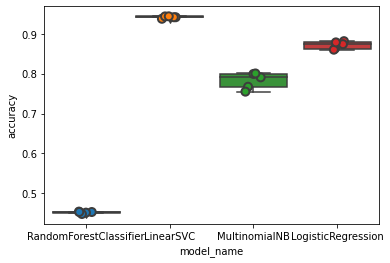

In [13]:
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [14]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.941861
LogisticRegression        0.871631
MultinomialNB             0.782713
RandomForestClassifier    0.451999
Name: accuracy, dtype: float64

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df2['SNAG_DESC'],df2['Status'],test_size=0.15,random_state=0)

vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,6), lowercase=True, stop_words='english')
X_train=vec.fit_transform(X_train)
X_test=vec.transform(X_test)

model=GradientBoostingClassifier(n_estimators=200, max_depth=3, random_state=0)
model.fit(X_train,y_train)
predicts_train = model.predict(X_train)
Training_Accuracy = accuracy_score(y_train,predicts_train)
print("Training_Accuracy :",Training_Accuracy*100 )
predicts_test = model.predict(X_test)
Testing_Accuracy = accuracy_score(y_test,predicts_test)
print("Testing_Accuracy :",Testing_Accuracy*100)

Training_Accuracy : 72.58226756717919
Testing_Accuracy : 68.60244233378562


In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df2['SNAG_DESC'],df2['Status'],test_size=0.15,random_state=7)
vec=CountVectorizer(strip_accents='ascii', token_pattern=u'(?ui)\\b\\w*[a-z]+\\w*\\b' or '\D',ngram_range=(0,6), lowercase=True, stop_words='english')
X_train=vec.fit_transform(X_train)
X_test=vec.transform(X_test)

from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
predicts_train = model.predict(X_train)
Training_Accuracy = accuracy_score(y_train,predicts_train)
print("Training_Accuracy :",Training_Accuracy*100)
predicts_test = model.predict(X_test)
Testing_Accuracy = accuracy_score(y_test,predicts_test)
print("Testing_Accuracy :",Testing_Accuracy*100)

ModuleNotFoundError: No module named 'xgboost'

# Applying Neural Networks

In [85]:
sentences_train, sentences_test, y_train, y_test = train_test_split(df['SNAG_DESC'].values, df['Status'].values, test_size=0.25, random_state=1000)
vectorizer = CountVectorizer(strip_accents='ascii',ngram_range=(0,6), stop_words='english')
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
#model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(100, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='relu'))

model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               46877700  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 46,878,941
Trainable params: 46,878,941
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(X_train, y_train,
                     epochs=10,
                     verbose=0,batch_size=10,
                     validation_data=(X_test, y_test)
                     )

In [91]:
from keras.backend import clear_session
clear_session()

In [92]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.3195
Testing Accuracy:  0.1604


In [57]:
vec.vocabulary_

{'': 0,
 'drawing': 91583,
 'note': 238112,
 'technology': 366046,
 'numbers': 255449,
 'holes': 151460,
 'diameter': 80103,
 'overflow': 266387,
 'fuel': 136655,
 'hole': 147357,
 'rolled': 325657,
 '8h9': 13362,
 'finalised': 122546,
 'd8h9': 72531,
 'reaming': 301802,
 'place': 281904,
 'rolling': 325717,
 'wo': 390928,
 'disign': 88402,
 'disposition': 88571,
 'drawing note': 95434,
 'note technology': 238513,
 'technology numbers': 366331,
 'numbers holes': 255826,
 'holes diameter': 151953,
 'diameter overflow': 85076,
 'overflow fuel': 266388,
 'fuel hole': 136690,
 'hole rolled': 150981,
 'rolled diameter': 325658,
 'diameter 8h9': 81007,
 '8h9 holes': 13438,
 'holes finalised': 152974,
 'finalised d8h9': 122552,
 'd8h9 reaming': 72541,
 'reaming place': 302187,
 'place rolling': 282283,
 'rolling wo': 325748,
 'wo disign': 390943,
 'disign disposition': 88403,
 'drawing note technology': 95596,
 'note technology numbers': 238514,
 'technology numbers holes': 366332,
 'numbers 

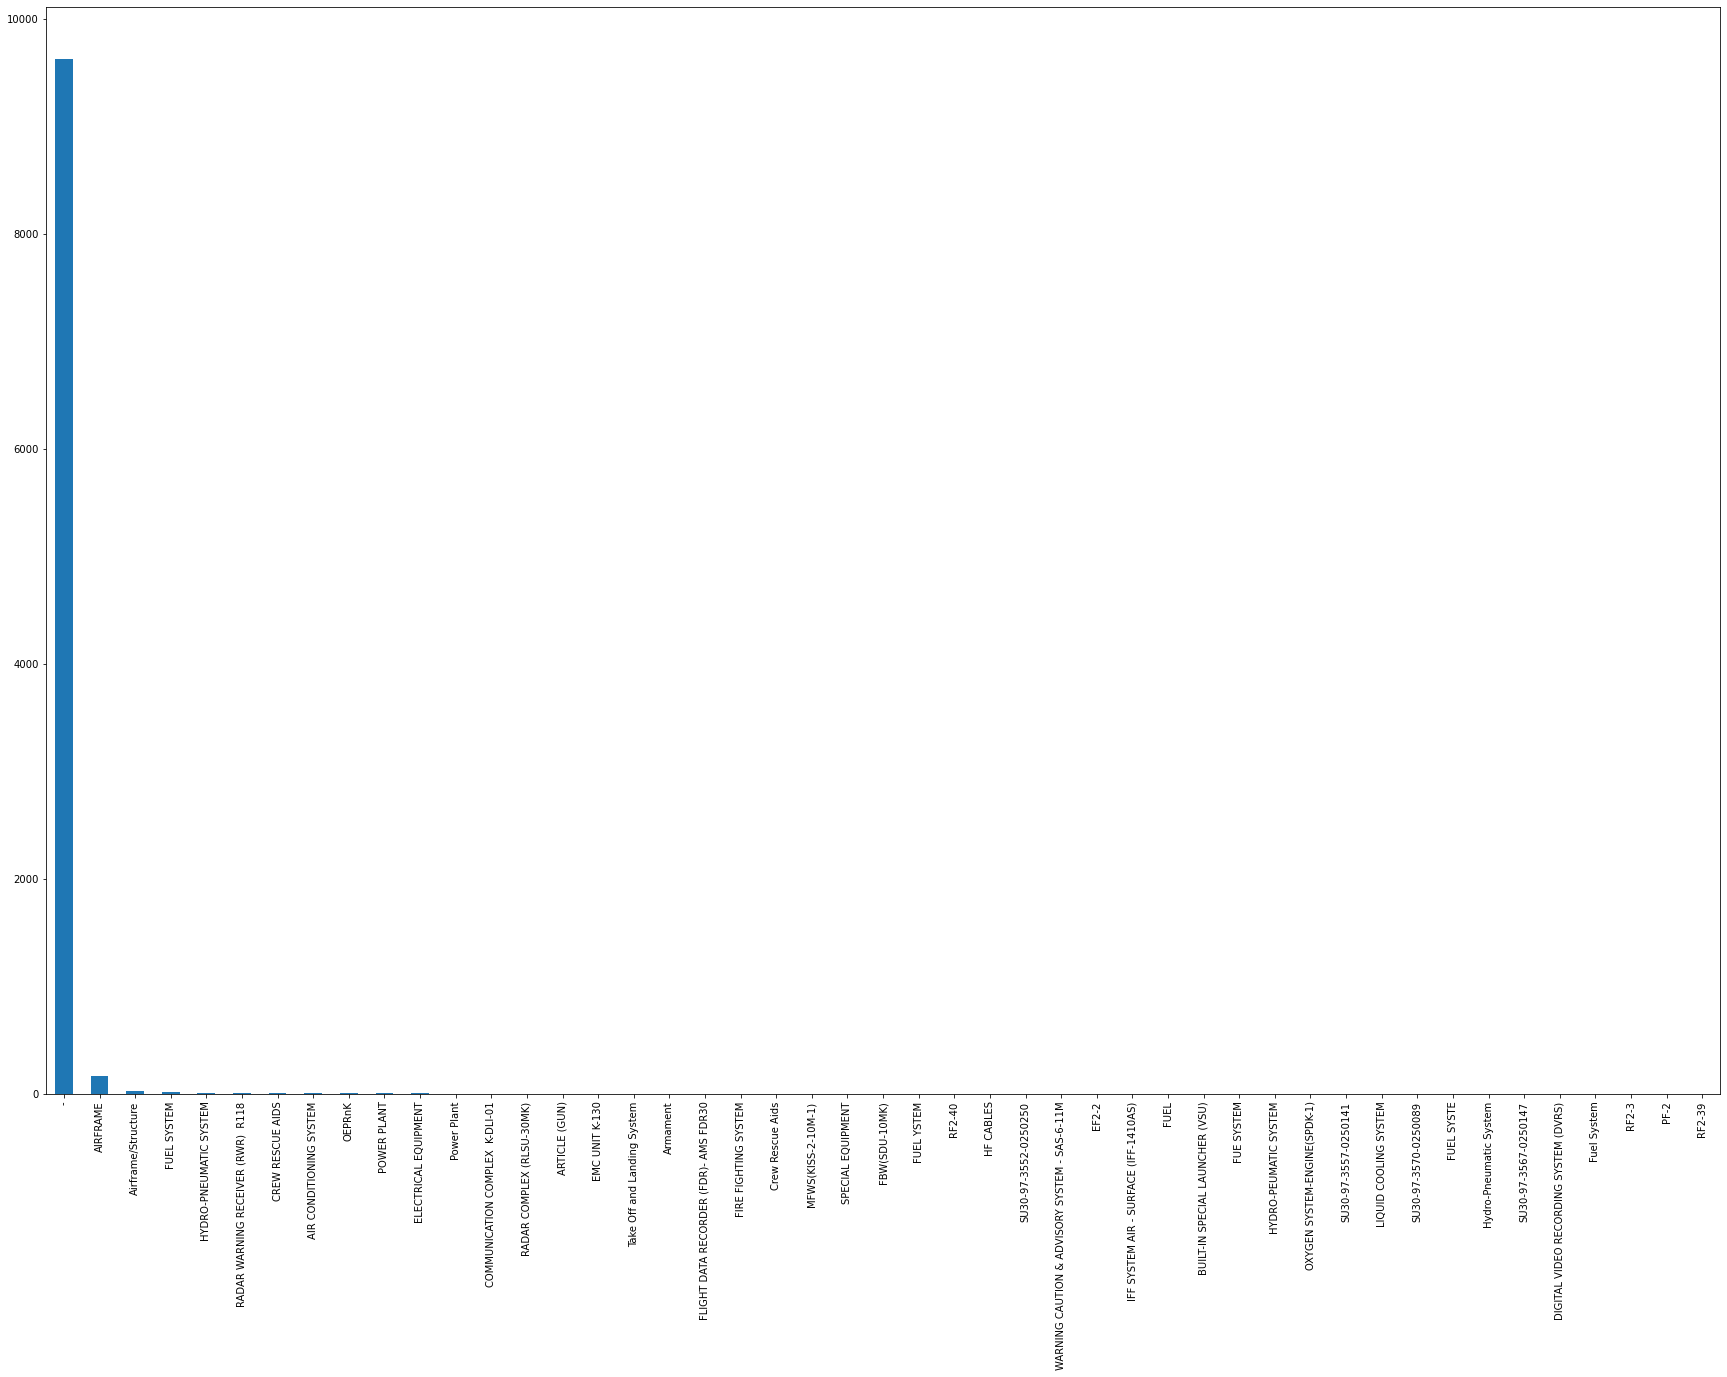

In [59]:
df['SYSTEM'].value_counts().plot.bar()
plt.show()